# <center> Closure: A Statistical Look Back on my Dota 2 Career
## <center> By: Will B.

## Introduction

### A Brief History of DotA

Have you ever been addicted? Smoking? Sex? Gambling? Hard drugs? While other folks were out pursuing these exciting vices during their youth, I was staying inside playing DotA.

DotA (short for Defense of the Ancients) is a five-versus-five online multiplayer strategy videogame, with its origins going all the way back to Blizzard Entertainment's *Warcraft 3* released in 2003. Originally a custom gamemode created by a community member by the name of 'Icefrog' in Warcraft's *Frozen Throne* expansion, DotA grew to be one of [the most played and influential online strategy games of all time](https://www.youtube.com/watch?v=qTsaS1Tm-Ic). With players all over the world playing what was essentially a fan-made spinoff, a competitive scene emmerged and DotA became among the first wave of serious eSports titles. It pioneered the "Multiplayer Online Battle Arena" (MOBA) genre of strategy games, and was subsequently ripped off hard by games like *League of Legends* years afterwards (I had to say it).

I started playing the original DotA in middle school, after my best friend helped me download a cracked version of *Frozen Throne* onto my first laptop. DotA is not an easy game - I was bad, for a long time. I almost gave up many times, but like any great pursuit in life, perseverance eventually rewarded me with some moderate level of success. I didn't completely suck, and the thrill of beating up on players who did was exhiliharating.

In 2011, Valve Corporation hired on Icefrog to create Dota 2 - a full-fledged, fully-funded sequel to his famous community mod. A public beta for the game launched in 2012, and I was among the first initial waves of testers to see DotA brought to a new era. Since its official release in 2013, Dota 2 has grown to be one of the biggest eSports in the world. The day prior to me writing this introduction, a professional team of players (Team Liquid) walked away with $10 million dollars for winning *The International*, Valve's seventh annual international Dota 2 tournament.

Dota 2 is a wonderfully strategic and rewarding game enjoyed daily by hundreds of thousands of players around the world. Since stats started being tracked on player activity in 2012, I've played 3647 matches. That being said, anyone who's ever played Dota 2 can tell you how addicting and toxic it is, too. Between awful teammates, thrown matches and cheesy strategies, Dota 2 can hollow out your soul if you play it long enough. It's like the black-tar heroin of online videogames, and earlier this year I kicked it for good.

### Why I'm doing this Analysis

Since DotA is a team game, the statistics of my individual performance aren't completely reliable indicators on whether I would win a certain match or not. There are also many other variables, such as matchmaking rating, item builds, and gold graphs that are beyond the scope of the data I have available. Given what I do have, I believe it's entirely possible to highlight some relationships between the general elements of my own gameplay.

For most of this analysis I'm going to examine the relationship between match result and the other variables in the dataset, since winning is the ultimate goal in each game of DotA. To rephrase this as a research question: **which aspects of my gameplay make me more likely to win or lose a match?** My hope for this analysis is provide some statistical evidence for the intuitions I've built up over 3000+ games.

For readers who aren't familiar with DotA, [here's a short video that'll give you the gist of what the game is about](https://www.youtube.com/watch?v=Cp8neRiF9-k). To get the most out of this analysis I'm going to go into a moderate amount of detail about gameplay mechanics and general strategy, but I'll explain these things as I go along.

Personally, going through the history of my Dota 2 career serves as the necessary closure to let go of the game for good. It's a love-hate kind of thing; the lows were so low, but the highs were so high. It'll be fun taking a trip down memory lane, even if all the memories weren't that great.

### The Data

All of my match data was sourced from [OpenDota](https://www.opendota.com/), an open-source data platform that grabs its data directly from Steam. OpenDota provides a great [API](https://docs.opendota.com/) for developers to build their own applications with. The data I'll be working with comes from two GET requests to the API; one for my match data, and one for general hero data. I loaded this data into a MySQL database and exported it into two CSV files - one with my match data joined with hero data and one with the hero data on its own - which I'll work with using Python's Pandas module. The code and CSVs I used for all of this can be found [here](https://github.com/billwarker/opendota-analysis).

## Loading and Preparing the Data

Before I can do any analysis, I'll have to load the data and clean things up a little bit.

In [1]:
### Imports

# Data Analysis
import pandas as pd
pd.options.display.max_columns = 50
import datetime # Working with time data
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

### DataFrame 1: Match Data

This first dataset contains information on every match of Dota 2 I've ever played, plus additional information about the hero I chose to play as.

In [2]:
### Load the data
data = pd.read_csv('dota_stats_headers.csv')
headers = data.columns
headers # List of data variables

Index(['result', 'radiant_win', 'duration', 'start_time', 'game_mode',
       'localized_name', 'kills', 'deaths', 'assists', 'primary_attr',
       'attack_type', 'carry', 'jungler', 'pusher', 'nuker', 'disabler',
       'initiator', 'durable', 'support', 'legs'],
      dtype='object')

A list of the data variables recorded for each match. Here's what they mean:

- **result**: Whether the team I was on won or not. 1 = Win, 0 = Loss.
- **radiant_win**: Whether the team on the Radiant side of the map won. 1 = True, 0 = False.
- **duration**: How long the match lasted, in seconds.
- **start_time**: The exact time the match started, measured in seconds since the Coordinated Universal Time stamp, January 1st, 1970
- **game_mode**: The game mode I was playing in. An irrelevant variable that'll be deleted later, since I found OpenDota's API to be unclear on the label encoding used for each mode.
- **localized_name**: The name of the hero I played. Will be changed to 'Hero' later for brevity.
- **kills**: The number of enemy heroes I killed during the match.
- **deaths**: The number of times I died during the match, either to enemy heroes or units, neutral creeps, or suicide.
- **assists**: The number of times I assisted a teammate in getting a kill.
- **primary_attr**: The primary attribute of my hero. Either agi (agility), int (intelligence), or str (strength).
- **attack_type**: How my hero does basic attacks. Either melee or ranged.
- **carry**: A hero that is the strongest in the lategame with more experience and items. 1 = Yes, 0 = No (same for all other roles).
- **jungler**: A hero that can spend the early game fighting neutral creeps in the jungle to gain experience and gold.
- **pusher**: A hero that can quickly push lanes and destroy enemy buildings. 
- **nuker**: A hero that can cast damage-dealing spells to quickly kill enemy heroes.
- **disabler**: A hero that can cast spells to prevent enemy heroes from doing things (e.g. stunning a hero so it can't move or attack, removing its damage, silencing it so it can't cast spells).
- **initiator**:A hero that is good at starting and controlling major teamfights.
- **durable**: A hero that has a lot of health or armor, allowing it to withstand fights and take a lot of damage.
- **support**: A hero that has a lot of spells useful for helping out the team, either by healing or strengthening allies. Often delegated to buy support items (i.e. wards, dust) for the team.
- **legs**: The number of legs my hero has. (Irrelevant?)

First things first - how many games did I play?

In [3]:
total_games = len(data)
total_games

3647

*Goddamn!*

In [4]:
headers_list = list(headers)
headers_list[5] = 'hero' # change 'localized_named' to 'hero'
data.columns = headers_list

Here's what the head (first 5 rows) of the data looks like. The data is stored in a pandas DataFrame object.

In [5]:
data.head()

,result,radiant_win,duration,start_time,game_mode,hero,kills,deaths,assists,primary_attr,attack_type,carry,jungler,pusher,nuker,disabler,initiator,durable,support,legs
0,1,0,1588,1331087702,0,Sand King,5,4,7,str,Melee,0,1,0,1,1,1,0,0,6
1,1,1,2754,1331096627,0,Razor,20,8,22,agi,Ranged,1,0,1,1,0,0,1,0,0
2,0,1,3321,1331153730,0,Razor,6,6,25,agi,Ranged,1,0,1,1,0,0,1,0,0
3,1,1,3569,1331159297,0,Storm Spirit,12,7,13,int,Ranged,1,0,0,1,1,1,0,0,2
4,0,0,3993,1331170894,0,Night Stalker,15,11,16,str,Melee,1,0,0,1,1,1,1,0,2


It's not ready for analysis yet - there are a few useful things we can add and clean up.

In [6]:
data['duration'] = round(data['duration'] / 60)

First, we convert the match duration from seconds to minutes. Next, we'll use Python's **datetime** module to take the **start_time** timestamp data and move it into new **year**, **month**, **day**, and **hour** variables in the DataFrame.

In [7]:
year = []
month = []
day = []
hour = []
for ix in data['start_time'].index:
    ts = datetime.datetime.fromtimestamp((data['start_time'][ix]))
    year.append(ts.year)
    month.append(ts.month)
    day.append(ts.day)
    hour.append(ts.hour)
data.insert(3, 'year', year)
data.insert(4, 'month', month)
data.insert(5, 'day', day)
data.insert(6, 'hour', hour)
data.drop('start_time', axis=1, inplace=True)

Here's what the DataFrame looks like with our time variables properly formatted:

In [8]:
data.head()

,result,radiant_win,duration,year,month,day,hour,game_mode,hero,kills,deaths,assists,primary_attr,attack_type,carry,jungler,pusher,nuker,disabler,initiator,durable,support,legs
0,1,0,26.0,2012,3,6,21,0,Sand King,5,4,7,str,Melee,0,1,0,1,1,1,0,0,6
1,1,1,46.0,2012,3,7,0,0,Razor,20,8,22,agi,Ranged,1,0,1,1,0,0,1,0,0
2,0,1,55.0,2012,3,7,15,0,Razor,6,6,25,agi,Ranged,1,0,1,1,0,0,1,0,0
3,1,1,59.0,2012,3,7,17,0,Storm Spirit,12,7,13,int,Ranged,1,0,0,1,1,1,0,0,2
4,0,0,67.0,2012,3,7,20,0,Night Stalker,15,11,16,str,Melee,1,0,0,1,1,1,1,0,2


Next, we're going to split the values in both **primary_attr** and **attack_type** into new dummy variables, to make things easier for manipulation later on. This adds the columns **agi**, **int**, **str**, **melee**, and **ranged** to the DataFrame.

In [9]:
primary_attr = pd.get_dummies(data['primary_attr'])
attack_type = pd.get_dummies(data['attack_type'])
data = pd.concat([data, primary_attr, attack_type], axis=1)

Now we add two new variables into the DataFrame: Kill/Death Ratio (**kdr**) and Kill/Death/Assist Ratio (**kda**). These are aggregates of the **kill**, **death**, and **assist** variables which provide good descriptive values to the balance of the three scored in each match.

**Kill/Death Ratio (KDR)** = $kills/deaths$

**Kill/Death/Assist Ratio (KDA)** = $(kills + assists)/deaths$

In [10]:
kda = (data['kills'] + data['assists'])/data['deaths']
kdr = data['kills']/data['deaths']
data.insert(13, 'kda', kda)
data.insert(14, 'kdr', kdr)

There were some matches I played where I never died once. This will throw the KDR and KDA ratios off for these matches however, since there'll be a division by 0. To mitigate this, for matches where I didn't die, I'll adjust the ratios to divide by 1 instead.

In [11]:
data.kdr[data.deaths == 0] = data.kills[data.deaths == 0] / 1
data.kda[data.deaths == 0] = (data.kills[data.deaths == 0] + data.assists[data.deaths == 0]) / 1

C:\Users\Will\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Will\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Finally, let's drop **game_mode**, since it offers no valuable insight for this analysis. The vast majority of my games (atleast 95% if I had to guess) were played in All Pick Mode, where players can directly pick the hero they want to play for the match.

In [12]:
data.drop(['game_mode'], axis=1, inplace=True)

With these adjustments made, we've now got a clean and easy DataFrame to work with.

In [13]:
data.head()

,result,radiant_win,duration,year,month,day,hour,hero,kills,deaths,assists,primary_attr,kda,kdr,attack_type,carry,jungler,pusher,nuker,disabler,initiator,durable,support,legs,agi,int,str,Melee,Ranged
0,1,0,26.0,2012,3,6,21,Sand King,5,4,7,str,3.000000,1.250000,Melee,0,1,0,1,1,1,0,0,6,0,0,1,1,0
1,1,1,46.0,2012,3,7,0,Razor,20,8,22,agi,5.250000,2.500000,Ranged,1,0,1,1,0,0,1,0,0,1,0,0,0,1
2,0,1,55.0,2012,3,7,15,Razor,6,6,25,agi,5.166667,1.000000,Ranged,1,0,1,1,0,0,1,0,0,1,0,0,0,1
3,1,1,59.0,2012,3,7,17,Storm Spirit,12,7,13,int,3.571429,1.714286,Ranged,1,0,0,1,1,1,0,0,2,0,1,0,0,1
4,0,0,67.0,2012,3,7,20,Night Stalker,15,11,16,str,2.818182,1.363636,Melee,1,0,0,1,1,1,1,0,2,0,0,1,1,0


### DataFrame 2: Hero Data
The second dataset I'm loading in only contains the variables for each hero in the game: their hero name, primary attribute, attack type, roles, and number of legs. I'll use this DataFrame to look at the distribution of these variables across the entire hero pool later on.

In [14]:
hero_data = pd.read_csv("dota_hero_stats.csv")

hero_headers = list(hero_data.columns)
hero_headers[0] = 'hero' # change 'localized_named' to 'hero'
hero_data.columns = hero_headers

hero_primary_attr = pd.get_dummies(hero_data['primary_attr'])
hero_attack_type = pd.get_dummies(hero_data['attack_type'])
hero_data = pd.concat([hero_data, hero_primary_attr, hero_attack_type], axis=1)

hero_data.tail() # the last 5 entries in the DataFrame

,hero,primary_attr,attack_type,carry,jungler,pusher,nuker,disabler,initiator,durable,support,legs,agi,int,str,Melee,Ranged
108,Phoenix,str,Ranged,0,0,0,1,1,1,0,1,2,0,0,1,0,1
109,Oracle,int,Ranged,0,0,0,1,1,0,0,1,2,0,1,0,0,1
110,Winter Wyvern,int,Ranged,0,0,0,1,1,0,0,1,2,0,1,0,0,1
111,Arc Warden,agi,Ranged,1,0,0,1,0,0,0,0,2,1,0,0,0,1
112,Monkey King,agi,Melee,1,0,0,0,1,1,0,0,2,1,0,0,1,0


Done! Let's get down to business.

## Analysis

### Win/Loss Ratio

First things first; the ultimate measure of whether you're a scrub or a pro... A legend or a mockery... The Win/Loss Ratio.

In [88]:
wins = len(data[data['result'] == 1])
wins_pct = round(wins/total_games, 3) * 100
losses = len(data[data['result'] == 0])
losses_pct = round(losses/total_games, 3) * 100

print('Wins: {} ({}%)'.format(wins, wins_pct))
print('Losses: {} ({}%)'.format(losses, losses_pct))

Wins: 1810 (49.6%)
Losses: 1837 (50.4%)


On average, I'm (ever so slightly more often) a ***LOSER!*** In all seriousness, I'm not some DotA pro, so it makes sense to have such an average W/L. Sometimes you win, sometimes you don't. Approximately half of the time. **For this reason, we're going to consider a W/L ratio of 0.5 the baseline;** ratios below it are bad, but ratios above it are good. Throughout this analysis I'll examine how certain variables affect my chances of winning relative to this baseline.

### Radiant/Dire Advantage

In Dota, you play on one of two teams: the Radiant or the Dire. There's no difference between being on either team except for the fact that the battlefield both teams play on is slightly asymmetrical. For a long time there was the conventional wisdom that the Dire team had a slight advantage as Roshan (a powerful monster on the map which drops an item that revives heroes) was on their side of the river that intersects the map. [This has been disproven however](https://www.joindota.com/en/news/29115-the-roshan-myth-debunking-the-dire-side-advantage), and the general consensus is that there is no substantive advantage that comes with being on a specific team. In theory, this should be reflected in my match results:

In [87]:
radiant_wins = data['radiant_win'].value_counts()

print('Radiant Win %:', round(radiant_wins[1]/len(data), 3))
print('Dire Win %:', round(radiant_wins[0]/len(data), 3))

Radiant Win %: 0.524
Dire Win %: 0.476


There appears to be a slight advantage to being on the Radiant side. Some reasons to why this might be can be found in the article linked above!

### Numerical Distributions

While Win/Loss and Radiant/Dire Advantage are interesting to look at, whether you win or lose in DotA is a result of your team - the sum is greater than the individual parts, as they say. Focusing more on my personal performance, a good place to start is the distribution of some numerical variables in the dataset. A boxplot will show where the first quartile, median, third quartile, and outliers lie for a given variable. What I've decided to plot below are the most interesting ones to investigate: **duration**, **kills**, **deaths**, **assists**, **kdr**, **kda**.

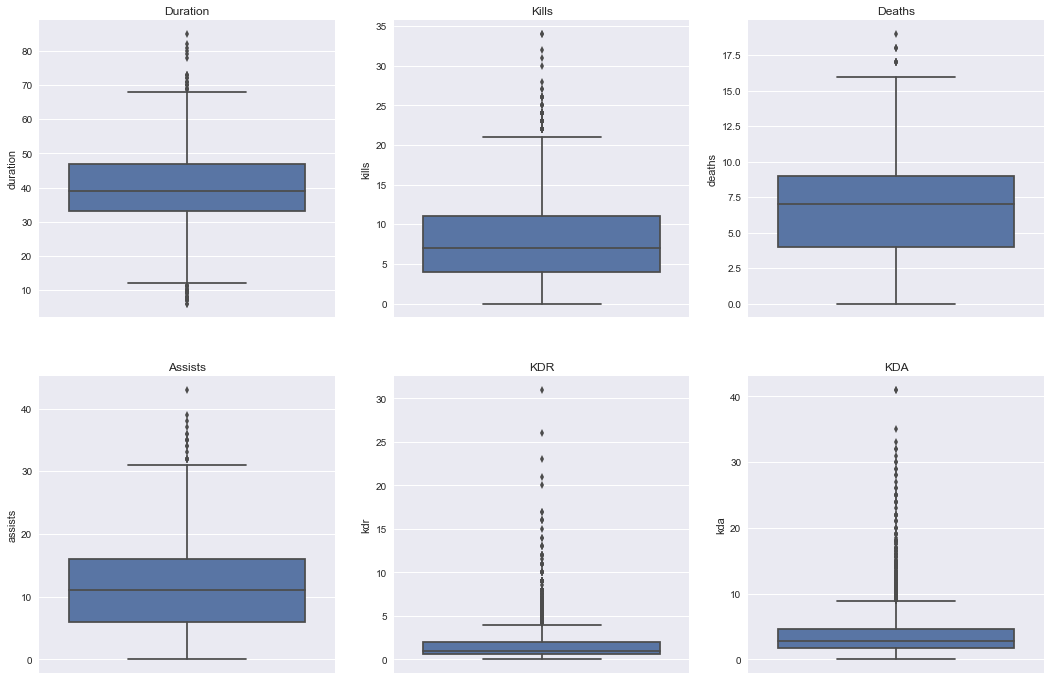

In [17]:
plt.figure(figsize=(18,12))
plt.subplot(2,3,1)
sns.boxplot(y=data['duration'])
plt.title('Duration')

plt.subplot(2,3,2)
sns.boxplot(y=data['kills'])
plt.title('Kills')

plt.subplot(2,3,3)
sns.boxplot(y=data['deaths'])
plt.title('Deaths')

plt.subplot(2,3,4)
sns.boxplot(y=data['assists'])
plt.title('Assists')

plt.subplot(2,3,5)
sns.boxplot(y=data['kdr'])
plt.title('KDR')

plt.subplot(2,3,6)
sns.boxplot(y=data['kda'])
plt.title('KDA')

This same data can be displayed in a table through pandas' **describe** function:

In [18]:
data.describe()

,result,radiant_win,duration,year,month,day,hour,kills,deaths,assists,kda,kdr,carry,jungler,pusher,nuker,disabler,initiator,durable,support,legs,agi,int,str,Melee,Ranged
count,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000,3647.000000
mean,0.496298,0.523718,39.826707,2013.424184,6.644091,15.742528,12.825884,8.040033,6.874417,11.526186,3.797090,1.628019,0.587606,0.088018,0.159309,0.790513,0.785029,0.590622,0.491637,0.192487,1.899644,0.361667,0.240197,0.398135,0.577461,0.422539
std,0.500055,0.499506,11.071830,1.237863,3.218161,8.674988,8.170603,5.325709,3.310602,6.626201,3.764007,1.982513,0.492333,0.283359,0.366014,0.406998,0.410859,0.491786,0.499999,0.394307,0.942573,0.480549,0.427262,0.489581,0.494031,0.494031
min,0.000000,0.000000,6.000000,2012.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.000000,2012.000000,4.000000,9.000000,3.000000,4.000000,4.000000,6.000000,1.666667,0.555556,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,39.000000,2013.000000,6.000000,16.000000,15.000000,7.000000,7.000000,11.000000,2.750000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,47.000000,2014.000000,9.000000,23.000000,20.000000,11.000000,9.000000,16.000000,4.571429,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,85.000000,2017.000000,12.000000,31.000000,23.000000,34.000000,19.000000,43.000000,41.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Duration**:
- Most games last between 33 and 47 minutes, with a median of 39 minutes. So if the game is trash, you're trapped for the better half of an hour.
- Shortest game was 6 minutes (someone disconnects after firstblood and the rest of their team leaves), longest game was 1 hour 25 minutes. Did I win that game?

In [19]:
data.loc[data['duration'] == 85]['result']

122    0
Name: result, dtype: int64

Damn; that's what you call a tough loss.

**Kills/Deaths/Assists/KDR/KDA**
- Average 8.04 kills per match, 6.87 deaths, 11.53 assists. The median, not as affected by outliers, gives what I consider to be a more typical representation: 7 kills, 7 deaths, 11 assists. The standard deviations for kills and assists are wide compared to the medians, while the standard deviation for deaths is a bit smaller. This means that there is a greater amount of variance in the kills I get per match, but I generally average pretty close to 7 deaths.


- Max kills: 35. Max deaths: 19.


- KDR and KDA naturally follow the ratios given for kills, deaths, and assists. Mean KDA: 3.79, Mean KDR: 1.63. Median KDA: 2.75, Median KDR: 1. The median KDR comes from both median kills and deaths being 7. The thing about DotA is, if you're losing, you're often getting wiped - getting wrecked by the other team and dying a lot. On the flip side, when you're winning, your KDA and KDR ratios will be pretty high (although not so much for KDR if you're a support). To demonstrate this, let's partition the data into wins and losses and examine the median KDRs and KDAs.

In [20]:
wins = data[data['result'] == 1]
losses = data[data['result'] == 0]

attrs = ['kdr', 'kda']
for a in attrs:
    print('Win', a, ':', wins[a].median())
    print('Loss', a, ':', losses[a].median())

Win kdr : 1.775
Loss kdr : 0.6666666666666666
Win kda : 4.333333333333333
Loss kda : 1.75


The majority of kills and deaths in DotA will largely occur as a result of teamfights in the mid to late game; where either one team (or both) have reached enough strength to make concentrated pushes towards the enemy's ancient. The outcome of these teamfights can have a pretty major impact on the momentum of the match, which will translate into the number of kills and deaths each player has. If you're winning the game, you're winning teamfights and slaying the other team. When you're losing... you're getting slayed. This is reflected pretty well in the ratios.

Let's examine the matches where I *definitely* slayed: the upper kill outlier matches (30+ kills):

In [21]:
data[data['kills'] > 30]

,result,radiant_win,duration,year,month,day,hour,hero,kills,deaths,assists,primary_attr,kda,kdr,attack_type,carry,jungler,pusher,nuker,disabler,initiator,durable,support,legs,agi,int,str,Melee,Ranged
1701,1,1,60.0,2013,9,26,0,Outworld Devourer,34,7,21,int,7.857143,4.857143,Ranged,1,0,0,1,1,0,0,0,4,0,1,0,0,1
2145,1,1,30.0,2014,1,30,15,Ember Spirit,31,1,10,agi,41.000000,31.000000,Melee,1,0,0,1,1,1,0,0,2,1,0,0,1,0
2214,1,0,53.0,2014,2,19,14,Ember Spirit,34,8,14,agi,6.000000,4.250000,Melee,1,0,0,1,1,1,0,0,2,1,0,0,1,0
2431,1,0,50.0,2014,5,11,2,Shadow Fiend,32,5,12,agi,8.800000,6.400000,Ranged,1,0,0,1,0,0,0,0,0,1,0,0,0,1


A couple things to notice here. First, all wins - your team has to be from a whole other dimension of suck to lose when you're doing this well. Second, all these heroes are carries and nukers. Third, the hero Ember Spirit accounts for half of this set. We'll explore heroes and hero roles shortly.

### Variable Correlation

A way to get a great overview of the variables in the dataset, and see which ones are particularly important, is to make a correlation matrix. This will show us which variables are positively and negatively correlated. If variable A is positively correlated with variable B, when A goes up, so does B. A negatively correlation would be when A goes down, B goes up.

In [22]:
match_corr = data.corr()

In [23]:
import seaborn as sns

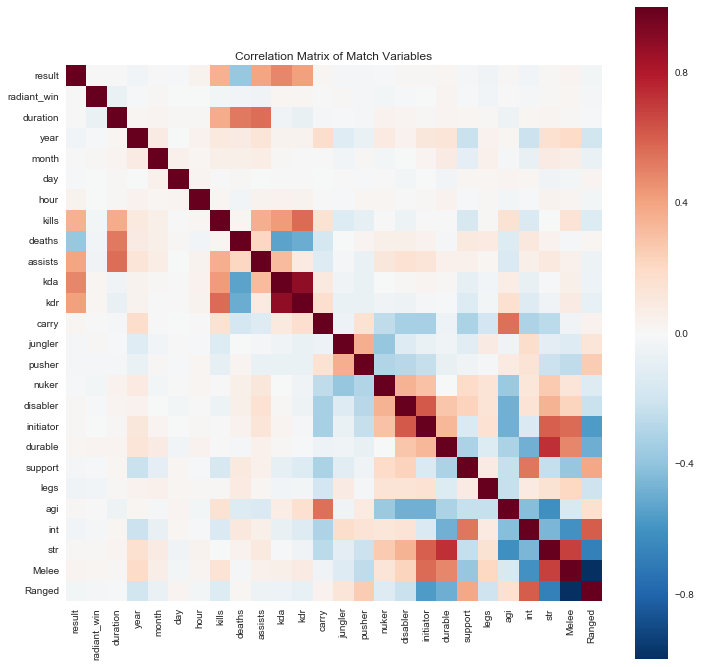

In [24]:
plt.figure(figsize=(12,12))
sns.heatmap(match_corr, vmax=1, square=True)
plt.title('Correlation Matrix of Match Variables')

The hotter a square looks, the more positively correlated its row/column variables are. The colder, the more negatively correlated.
- Some variables have very obvious correlations. For example, the correlation between Melee and Ranged attack types is -1; you can only be one or the other. KDR and KDA have a very strong positve correlation, because they're both derived from largely the same variables (kills and deaths).


- The duration of the game has positive correlations with kills, deaths, and assists. This intuitively makes sense; longer games mean more time spent fighting, killing, and dying. What's most interesting is that duration is more strongly correlated with deaths than kills. This would suggest that in longer games, I'm more likely to die than kill.


- That being said, there's no substantive correlation between duration and match result. Result shows moderate positve correlations with kills, deaths, KDR, and KDA. The strongest correlation is with KDA, suggesting that it's more important to have a higher KDA than it is to have a higher KDR if you want to win. The only difference between the two metrics is assists, showing that the more you can help your teammates get kills, the more likely your team is to win. Playing with the team is more effective than being a lone wolf - shocking!


- Hero roles, attributes, and attack types are correlated (more on all these things soon to come). Strength heroes are postively correlated with being melee and durable. Intelligence heroes are positively correlated with being supports and ranged (and are negatively correlated with being durable). Agility heroes have a moderate positve correlation with being carries, but don't have any correlations with either attack type.

### Hero Stats

In Dota 2, every player controls a unique hero character. How well you can play your chosen hero, and how well it fits into your team's lineup, are crucial factors in winning a match. In this section I'll examine which heroes I played the most, and had the best W/L, KDR, and KDA ratios with. At the time of writing this, there are currently 113 heroes to pick from in Dota 2. 

In [25]:
total_hero_pool = len(hero_data)
ive_played = len(data['hero'].unique())
ive_played_pct = round(ive_played/total_hero_pool, 2) * 100
print("I've played {} out of {} total heroes atleast once, or {}% of the total roster.".format(ive_played,
                                                                                               total_hero_pool,
                                                                                               ive_played_pct))

I've played 100 out of 113 total heroes atleast once, or 88.0% of the total roster.


Although I've played 88% of all total heroes in the game, I haven't played them all in equal amounts. Because of this, it makes the most sense to pay attention to the ratios with heroes I've played a significant amount of times. To illustrate this point, let's look at the top 5 heroes I have the highest W/L ratios with:

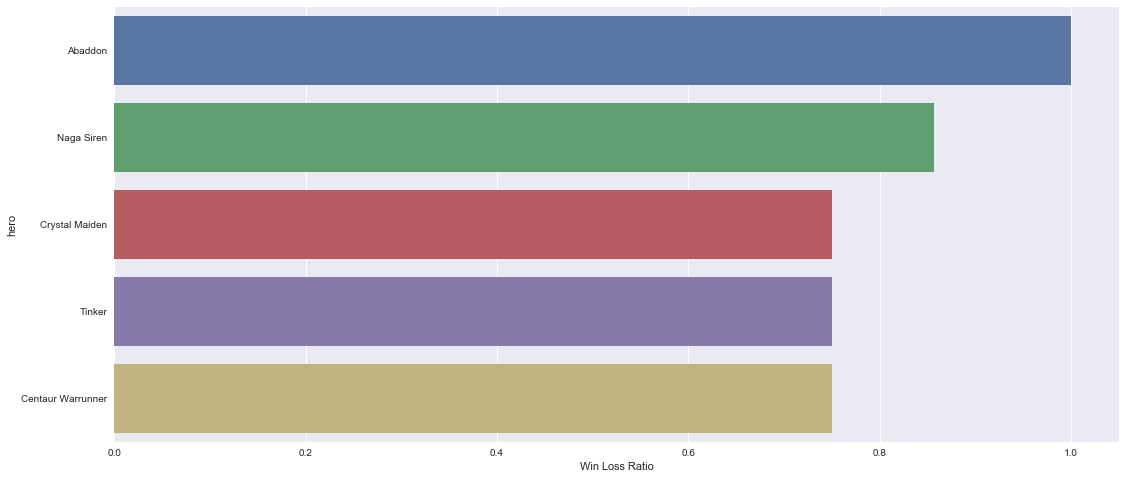

In [26]:
# Top 5 W/L ratios
plt.figure(figsize=(18,8))
hero = data.groupby('hero')
hero_winloss = hero['result'].mean().sort_values(ascending=False)
top5_winloss = hero_winloss[:5]
sns.barplot(x=top5_winloss, y=top5_winloss.index)
plt.xlabel('Win Loss Ratio')

A perfect W/L ratio with Abaddon, and over 70% ratio with the other four. But how often have I played each one?

In [27]:
for hero in top5_winloss.index:
    times_played = len(data[data['hero'] == hero])
    times_played_pct = round(times_played / total_games, 3) * 100
    print("I've played {} {} times, or {}% of my total games.".format(hero, times_played, times_played_pct))

I've played Abaddon 3 times, or 0.1% of my total games.
I've played Naga Siren 7 times, or 0.2% of my total games.
I've played Crystal Maiden 4 times, or 0.1% of my total games.
I've played Tinker 8 times, or 0.2% of my total games.
I've played Centaur Warrunner 4 times, or 0.1% of my total games.


Clearly, I'll have to sort by the number of times I've played each hero to get meaningful conclusions. For the purposes of this analysis, lets focus on the 30 heroes I've played the most.

In [28]:
hero_mostplayed30 = data['hero'].value_counts()[:30]
mostplayed30_winloss = hero_winloss[hero_mostplayed30.index]

In [29]:
total_hero_pct = 0
for num_games in hero_mostplayed30:
    pct = (num_games/total_games) * 100
    total_hero_pct += pct
print('The top 30 heroes account for {}% of my total games.'.format(round(total_hero_pct, 2)))

The top 30 heroes account for 73.62% of my total games.


These 30 heroes cover a good majority of my total games, so I'm comfortable leaving out the remaining 83. Let's start by looking at the top 30 heroes and their W/L ratios:

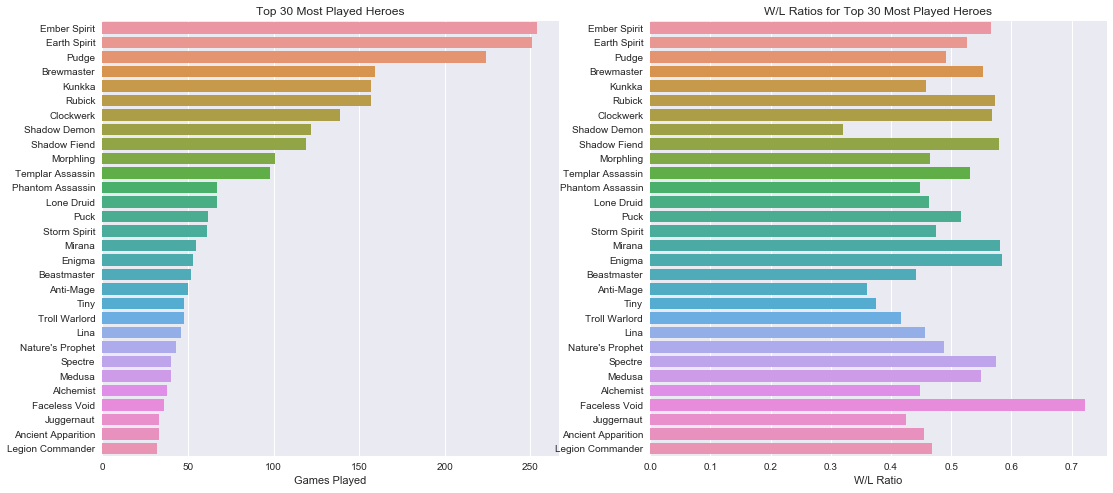

In [30]:
plt.figure(figsize=(18,8))

plt.subplot(1, 2, 1)
sns.barplot(x=hero_mostplayed30, y=hero_mostplayed30.index)
plt.title('Top 30 Most Played Heroes')
plt.xlabel('Games Played')

plt.subplot(1, 2, 2)
sns.barplot(x=mostplayed30_winloss, y=hero_mostplayed30.index)
plt.title('W/L Ratios for Top 30 Most Played Heroes')
plt.xlabel('W/L Ratio')

- My top 6 played heroes are Ember Spirit, Earth Spirit, Pudge, Brewmaster, Kunkka, and Rubick. I've played each of these heroes over 150 times!

In [31]:
print('Top 6 W/L Ratios')
print('----------------')
for hero in mostplayed30_winloss.index[:6]:
    print(hero, round(mostplayed30_winloss[hero],3))

Top 6 W/L Ratios
----------------
Ember Spirit 0.567
Earth Spirit 0.526
Pudge 0.491
Brewmaster 0.553
Kunkka 0.459
Rubick 0.573


- 4 of these top 6 heroes are strength heroes, all with strong nuking, disabling, and initiating capabilities.


- Despite being played over 150 times each, Pudge and Kunkka both have W/L ratios lower than 0.5; I'm more likely to lose games playing as these heroes. Ember Spirit and Rubick have the highest W/L ratios with 0.567 and 0.573 respectively.


- Of my 30 most played heroes, Faceless Void blows everyone else's W/L ratios out of the water, scoring ~0.75. This is roughly 30% higher than the highest ratio in my top 6 heroes! However, given how much less I've played Void compared to any of these heroes, it's unlikely that I'm really much more likely to win with Void. I would imagine that playing more games would bring FV's W/L closer to those in the top 6.

Next, let's take a look at the KDR and KDA ratios of the top 30. For this portion of the Hero Analysis, I'm going to focus on the median values for these variables. In the numerical distributions section of the analysis, the boxplots showed a lot of upper-end outliers for kills and assists. I'm interested in the typical KDA and KDR performances for my top 30 heroes across the many games I've played, so using the median instead of the mean will give me numbers that are more resistant to those outlier matches.

In [32]:
mostplayed30_kdr = data.groupby('hero')['kdr'].median()[hero_mostplayed30.index]
mostplayed30_kda = data.groupby('hero')['kda'].median()[hero_mostplayed30.index]

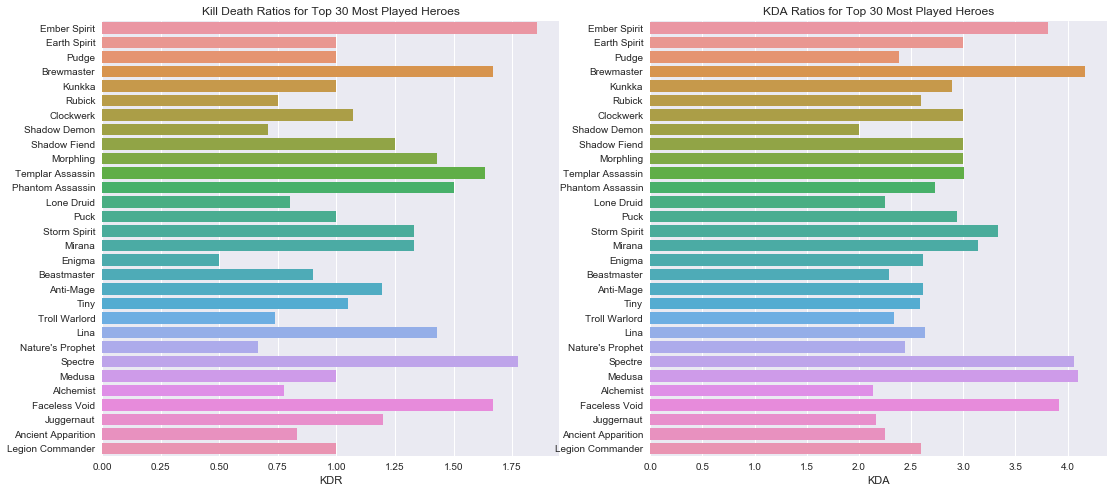

In [33]:
plt.figure(figsize=(18,8))

plt.subplot(1, 2, 1)
sns.barplot(x=mostplayed30_kdr, y=hero_mostplayed30.index)
plt.title('Kill Death Ratios for Top 30 Most Played Heroes')
plt.xlabel('KDR')

plt.subplot(1, 2, 2)
sns.barplot(x=mostplayed30_kda, y=hero_mostplayed30.index)
plt.title('KDA Ratios for Top 30 Most Played Heroes')
plt.xlabel('KDA')

In [34]:
print('Brewmaster KDA:', mostplayed30_kda['Brewmaster'])
print('Storm Spirit KDA:', mostplayed30_kda['Storm Spirit'])

Brewmaster KDA: 4.16666666667
Storm Spirit KDA: 3.33333333333


- Ember Spirit, my most played hero, has both very high KDR and KDA ratios, as well as a relatively high W/L.


- Brewmaster, my fourth most played hero, has the highest KDA in the top 30. Also has a pretty good W/L too! 


- Large differences between heroes' KDRs and KDAs can provide evidence about their general playstyles. For example, both Templar Assassin and Phantom Assassin have much higher KDRs than KDAs; this would suggest that more of the action they see is in solo engagements where they're hunting down enemy players - ya know, doing assassin things - without the rest of the team (resulting in less assists). Heroes like Enigma, Puck, and Medusa have abilities that are more oriented towards teamfights, hence the higher KDAs (more assists).

Let's not get too hung up on the positives - which heroes in the top 30 do I die the most as? In DotA, the term used for excessively dying is "feeding", as with each death you help the enemy team grow stronger with gold and experience points. You don't want to be a feeder.

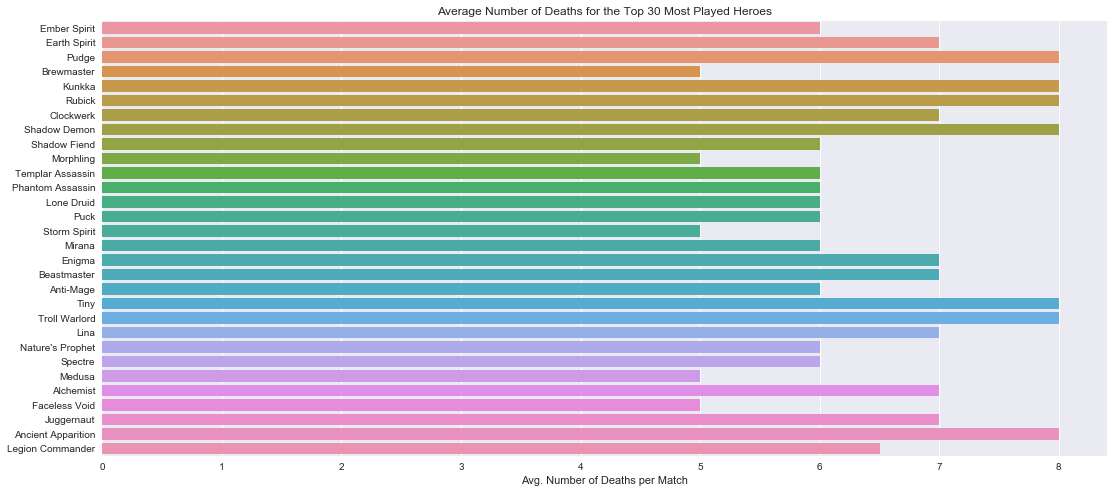

In [35]:
mostplayed30_deaths = data.groupby('hero')['deaths'].median()[hero_mostplayed30.index]

plt.figure(figsize=(18,8))
sns.barplot(x=mostplayed30_deaths, y=hero_mostplayed30.index)
plt.title('Average Number of Deaths for the Top 30 Most Played Heroes')
plt.xlabel('Avg. Number of Deaths per Match')

- The ceiling (max value) for median deaths is 8 per match, while the floor (min value) is 5. Half of my top 6 heroes have deaths at the ceiling level. Brewmaster is the only one with deaths at the floor!


- Two of my most-played heroes with medians of 8 deaths are Rubick and Shadow Demon. Both of these intelligence heroes are typically played as supports, which can help explain the high death counts. Supports (should) prioritize helping the team grow stronger rather than growing stronger themselves, and as a result tend to be underleveled and underpowered as the game progresses. This makes them easy targets for enemy carries, where in teamfights they generally aim to pick off the easy kills before ganging up on tougher heroes to bring down.


The correlation matrix earlier showed a moderate negative correlation between deaths and result. This correlation can be evidenced by looking at the W/L ratios of my highest feeding heroes:

In [36]:
dead_guys = ['Pudge', 'Kunkka', 'Rubick', 'Shadow Demon', 'Troll Warlord', 'Tiny', 'Ancient Apparition']
good_or_bad_wl = ['<---- Good!' if mostplayed30_winloss[hero] > 0.5 else '<---- Bad!' for hero in dead_guys]
for ix, hero in enumerate(dead_guys):
    if len(hero) < 10: # formatting
        print(hero, '\t\t\tMed. # Deaths:', round(mostplayed30_deaths[hero],3),
              '\tW/L Ratio:', round(mostplayed30_winloss[hero],3), '\t', good_or_bad_wl[ix])
    elif len(hero) > 16:
         print(hero, '\tMed. # Deaths:', round(mostplayed30_deaths[hero],3),
               '\tW/L Ratio:', round(mostplayed30_winloss[hero],3), '\t', good_or_bad_wl[ix])
    else:
        print(hero, '\t\tMed. # Deaths:', round(mostplayed30_deaths[hero],3),
              '\tW/L Ratio:', round(mostplayed30_winloss[hero],3), '\t', good_or_bad_wl[ix])

Pudge 			Med. # Deaths: 8.0 	W/L Ratio: 0.491 	 <---- Bad!
Kunkka 			Med. # Deaths: 8.0 	W/L Ratio: 0.459 	 <---- Bad!
Rubick 			Med. # Deaths: 8.0 	W/L Ratio: 0.573 	 <---- Good!
Shadow Demon 		Med. # Deaths: 8.0 	W/L Ratio: 0.32 	 <---- Bad!
Troll Warlord 		Med. # Deaths: 8.0 	W/L Ratio: 0.417 	 <---- Bad!
Tiny 			Med. # Deaths: 8.0 	W/L Ratio: 0.375 	 <---- Bad!
Ancient Apparition 	Med. # Deaths: 8.0 	W/L Ratio: 0.455 	 <---- Bad!


Rubick is the clear exception here - this support character has the highest W/L ratio of my top 6 played heroes, but also quite a high number of median deaths as well. Why? For support heroes like Rubick, their biggest contribution to the team comes from assisting in teamfights, not necessarily getting kills. Supports are often squishy (i.e. easy to kill), but if they can get off their important spells in big fights before dying, they play a major role in winning these pivotal encounters.

This helps explain Rubick's W/L Ratio, but sometimes you just feed. Let's compare Rubick, Shadow Demon, and the entire hero pool's average assists to gather more insight:

In [37]:
import scipy.stats as stats

Rubick's average assists: 14.0191082803 Standard Deviation: 6.86676787984
Shadow Demon's average assists: 10.6721311475 Standard Deviation: 6.59289560871
Average assists across hero pool: 10.676741024117357 Standard Deviation: 5.848425916345039


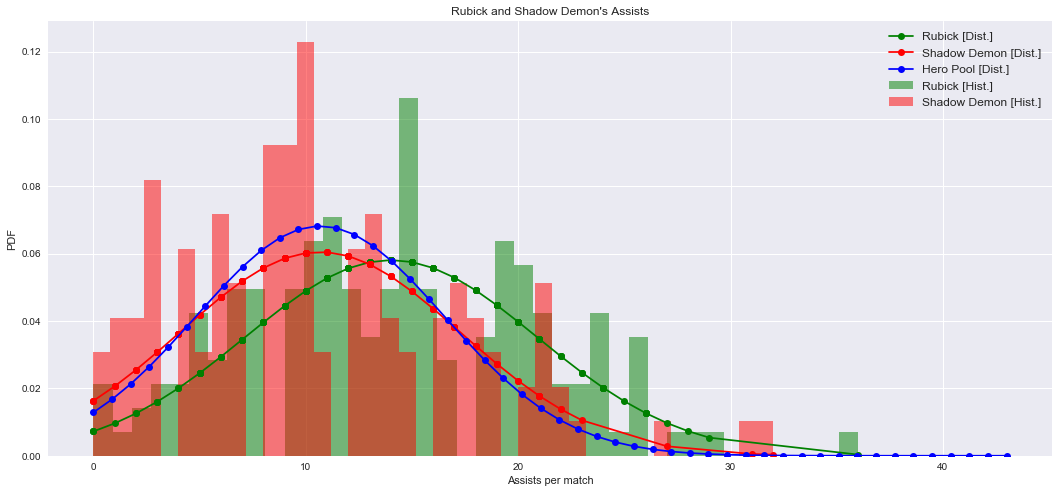

In [38]:
rubick_sorted = sorted(data[data['hero'] == 'Rubick']['assists'])
rubick_mean = np.mean(rubick_sorted)
rubick_std = np.std(rubick_sorted)

sd_sorted = sorted(data[data['hero'] == 'Shadow Demon']['assists'])
sd_mean = np.mean(sd_sorted)
sd_std = np.std(sd_sorted)

pool_mean = data.groupby('hero')['assists'].mean().mean()
pool_std = data.groupby('hero')['assists'].std().mean()

min_assists = data['assists'].min()
max_assists = data['assists'].max()
assist_space = np.linspace(min_assists, max_assists)

print("Rubick's average assists:", rubick_mean, 'Standard Deviation:', rubick_std) 
print("Shadow Demon's average assists:", sd_mean, 'Standard Deviation:', sd_std)
print("Average assists across hero pool:", pool_mean, 'Standard Deviation:', pool_std)

plt.figure(figsize=(18,8))
plt.plot(rubick_sorted, stats.norm.pdf(rubick_sorted, rubick_mean, rubick_std), 'go-', label='Rubick [Dist.]')
plt.hist(rubick_sorted, bins=40, alpha=0.5, color='g', normed=True, label='Rubick [Hist.]')
plt.plot(sd_sorted, stats.norm.pdf(sd_sorted, sd_mean, sd_std), 'ro-', label='Shadow Demon [Dist.]')
plt.hist(sd_sorted, bins=40, alpha=0.5, color='r', normed=True, label='Shadow Demon [Hist.]')
plt.plot(assist_space, stats.norm.pdf(assist_space, pool_mean, pool_std), 'bo-', label='Hero Pool [Dist.]')

plt.ylabel('PDF')
plt.xlabel('Assists per match')
plt.legend(fontsize='large')
plt.title("Rubick and Shadow Demon's Assists")

In the above histograms of Rubick and Shadow Demon's assists per match, we can see that Shadow Demon's skews more than Rubick's towards the lower end of the sample space. By fitting Rubick, Shadow Demon, and the entire hero pool's average assists to normal distributions, we get a decent approximation of how assists for the heroes are distributed. Shadow Demon's distribution curve is closely in line with the rest of the hero pool, while Rubick's is shifted more to the right. Centered around an average of 14 assists per game, this shows that there's a greater chance of Rubick having a high amount of assists per match (see the margin between Rubick's distribution curve and the others around 20 assists).

In conclusion, if you're going to feed - atleast try to be useful to your team before you die!

### Primary Attribute

Heroes come in three flavours: Agility, Intelligence, and Strength. Everytime heroes level up, they are rewarded with a set number of agility, intelligence, and strength points.

- Agility points increase a hero's attack speed
- Strength points increase a hero's overall health points and health regeneration rate
- Intelligence points increase a hero's overall mana points and mana regeneration rate

For heroes of a particular attribute, points in that attribute (either gained through leveling up or items) also increase the amount of damage they do each attack. Generally speaking, Agility heroes are carries, as their role is to deal massive amounts of damage as quickly as possible. Strength heroes are the tanky durable heroes, often playing the role of initiator in fights - soak up as much damage as possible and force enemies to focus on you while your team does its thing. Intelligence heroes are typically supports, with nuking (i.e. burst damage) or disabling abilities. They want to fire off as many of their spells as possible and control the fight. This is the template most heroes follow, but there are plenty of exceptions and offshoots as well (e.g. Intelligence-based carry heroes).

Let's look at which primary attributes I played the most, as well as their W/L, KDR, and KDA ratios.

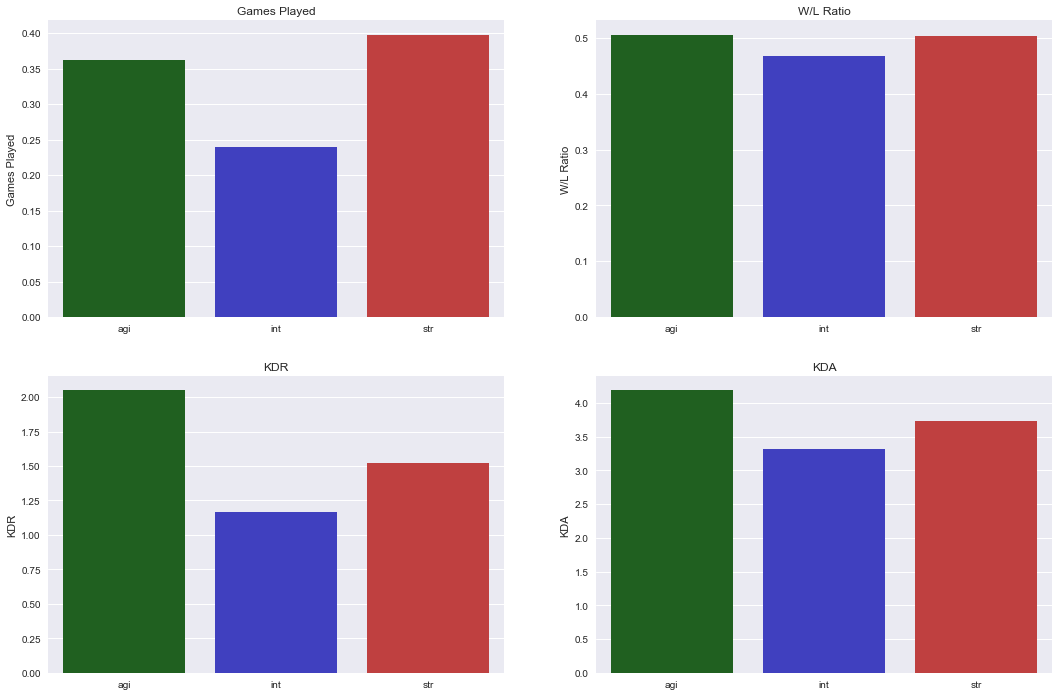

In [90]:
primary_attr = data['primary_attr'].value_counts().reindex(['agi', 'int', 'str'])
attr_palette = ['green', 'blue', 'red'] # agi, int, str colours

plt.figure(figsize=(18,12))
plt.subplot(2, 2, 1)
sns.barplot(x=primary_attr.index, y=primary_attr/total_games, palette=attr_palette, saturation=0.5)
plt.ylabel('Games Played')
plt.title('Games Played')

plt.subplot(2, 2, 2)
primary_attr_wl = data.groupby('primary_attr')['result'].mean()
sns.barplot(primary_attr_wl.index, primary_attr_wl, palette=attr_palette, saturation=0.5)
plt.ylabel('W/L Ratio')
plt.xlabel('')
plt.title('W/L Ratio')

plt.subplot(2, 2, 3)
primary_attr_kdr = data.groupby('primary_attr')['kdr'].mean()
sns.barplot(primary_attr_kdr.index, primary_attr_kdr, palette=attr_palette, saturation=0.5)
plt.ylabel('KDR')
plt.xlabel('')
plt.title('KDR')

plt.subplot(2, 2, 4)
primary_attr_kda = data.groupby('primary_attr')['kda'].mean()
sns.barplot(primary_attr_kda.index, primary_attr_kda, palette=attr_palette, saturation=0.5)
plt.ylabel('KDA')
plt.xlabel('')
plt.title('KDA')

In [41]:
print(primary_attr_wl) # more closely examine W/L

primary_attr
agi    0.506444
int    0.468037
str    0.504132
Name: result, dtype: float64


- Approximately 40% of my games were as strength heroes, with agility and intelligence following up with 36% and 24% respectively. The difference between intelligence and the other two attributes shows a pretty clear bias against it (and perhaps supporting?).


- W/L ratios between attributes is essentially even at 0.5 for agility and strength, but takes a dip for intelligence.


- Agility is the clear winner for KDR, with an average ratio around 2. This can be explained by the generalization that most agility heroes are carries which get more kills. Conversely, the average for support-focused intelligence heroes is just above neutral.


- When taking assists into account with KDA, things even up considerably between the three attributes. Agility is still a clear lead, but the distance between it, and intelligence/strength is much less than KDR.


- While it's easier to see that intelligence heroes perform less well in all categories, the disclaimer here is that I've also played them considerably less. The difference in W/L, KDR, and KDA is still enough to suggest that conclusion, but I would imagine that intelligence's ratios would improve given more attention and practice.

Before we move on, let's see what the overall distribution of primary attributes is in the total hero pool:

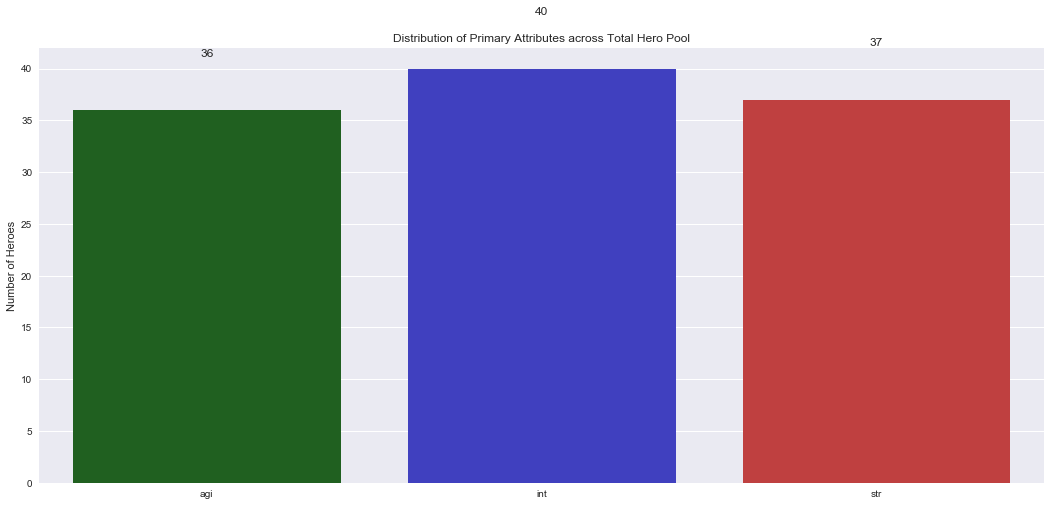

In [42]:
pool_primary_attr = hero_data['primary_attr'].value_counts().reindex(['agi', 'int', 'str'])
plt.figure(figsize=(18,8))
sns.barplot(pool_primary_attr.index, pool_primary_attr, palette=attr_palette, saturation=0.5)
plt.ylabel('Number of Heroes')
plt.xlabel('')
plt.title('Distribution of Primary Attributes across Total Hero Pool')

Intelligence is the most common primary attribute in the pool... And also my least played! This supports the idea of a bias against it.

### Attack Type

The two attack types, melee and ranged, are how heroes regularly attack enemy units. One slashes with claws, another throws fireballs, etc... There's even a hero that smacks people with tree branches, which is pretty fun.

In [43]:
## First, a nifty function to annotate barplots
def annotate(horizontal=False):
    ax = plt.gca()    
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height() + 5, '%d' % int(p.get_height()), 
            fontsize=12, ha='center', va='bottom')

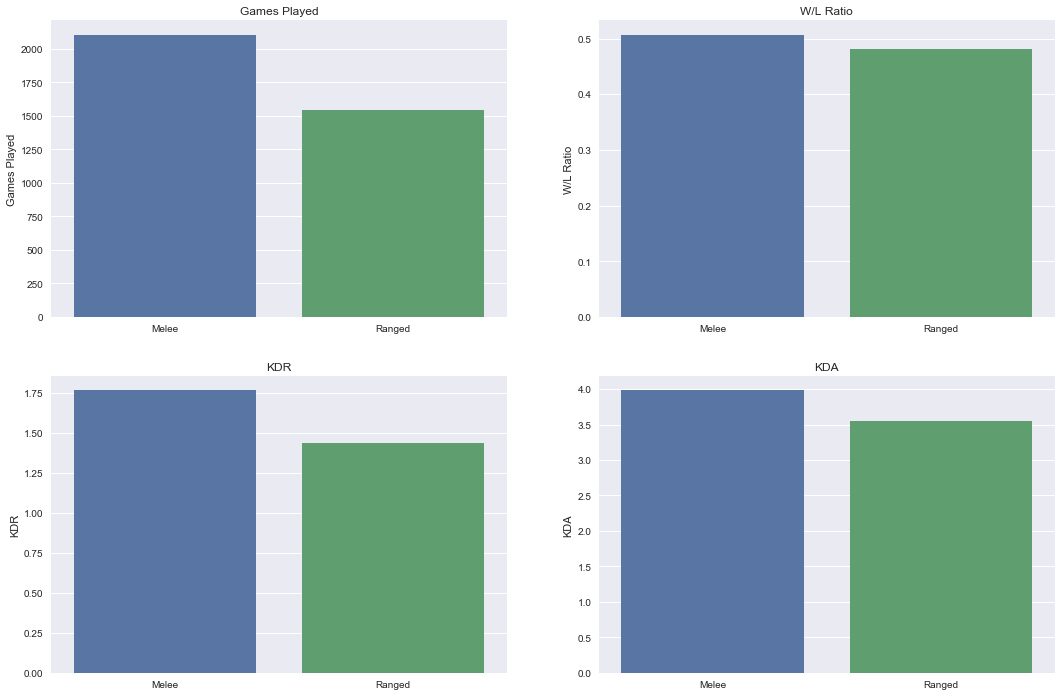

In [91]:
attack_type_total = data['attack_type'].value_counts()

plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.barplot(attack_type_total.index, attack_type_total)
plt.ylabel('Games Played')
plt.title('Games Played')

plt.subplot(2,2,2)
attack_type_wl = data.groupby('attack_type')['result'].mean()
sns.barplot(attack_type_wl.index, attack_type_wl)
plt.ylabel('W/L Ratio')
plt.xlabel('')
plt.title('W/L Ratio')

plt.subplot(2,2,3)
attack_type_kdr = data.groupby('attack_type')['kdr'].mean()
sns.barplot(attack_type_total.index, attack_type_kdr)
plt.ylabel('KDR')
plt.title('KDR')

plt.subplot(2,2,4)
attack_type_kda = data.groupby('attack_type')['kda'].mean()
sns.barplot(attack_type_total.index, attack_type_kda)
plt.ylabel('KDA')
plt.title('KDA')

In [45]:
attack_type_wl # exact W/L values

attack_type
Melee     0.507123
Ranged    0.481506
Name: result, dtype: float64

- Each statistic is higher with melee heroes than with ranged; I've played approximately 500 more games with melee heroes, which suggests a moderate preference towards them.


- Being melee or ranged has a tiny impact on match outcome; on average I tend to do win more more with melee heroes and lose more with ranged.


- This higher W/L correlates with the higher melee KDR and KDA ratios.


- The margin between attack types for each statistic can be explained in part by looking at which primary attributes are typically associated with which attack types:

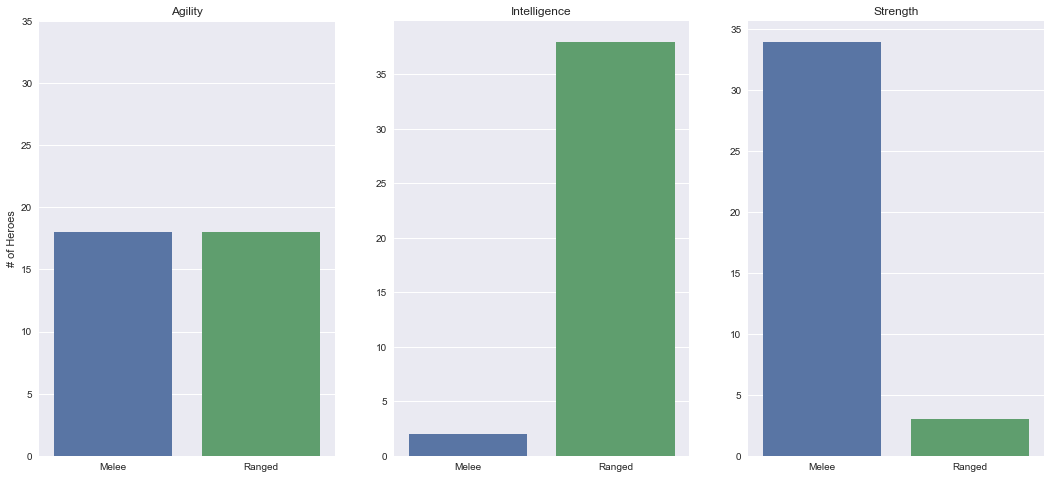

In [93]:
attack_type_attrs = hero_data.groupby(['attack_type', 'primary_attr'])['hero'].unique() #switching to the hero_data dataframe
agi_attack_types = [len(attack_type_attrs['Melee']['agi']), len(attack_type_attrs['Ranged']['agi'])]
int_attack_types = [len(attack_type_attrs['Melee']['int']), len(attack_type_attrs['Ranged']['int'])]
str_attack_types = [len(attack_type_attrs['Melee']['str']), len(attack_type_attrs['Ranged']['str'])]
attack_type_labels = ('Melee', 'Ranged')

plt.figure(figsize=(18,8))

plt.subplot(1,3,1)
sns.barplot(attack_type_labels, agi_attack_types)
plt.yticks(np.arange(0,40,5))
plt.title('Agility')
plt.ylabel('# of Heroes')

plt.subplot(1,3,2)
sns.barplot(attack_type_labels, int_attack_types)
plt.yticks(np.arange(0,40,5))
plt.title('Intelligence')

plt.subplot(1,3,3)
sns.barplot(attack_type_labels, str_attack_types)
plt.yticks(np.arange(0,40,5))
plt.title('Strength')

The barplots above show the number of heroes that are either melee or ranged for each primary category. We can see a total inverse of the attack types for intelligence and strength, with each being almost exclusively ranged or melee. 

Thinking back to how much I've played each primary attribute, it would seem that my preference towards strength and agility heroes causes me to often pick from a subset that is predominantly melee. That being said, both intelligence and strength do have a few outliers:

In [47]:
# outliers: strength + ranged, intelligence + melee

str_ranged = hero_data[hero_data['primary_attr'] == 'str'].loc[hero_data['attack_type'] == 'Ranged']
print('Strength and Ranged:', str_ranged['hero'].unique())

int_melee = hero_data[hero_data['primary_attr'] == 'int'].loc[hero_data['attack_type'] == 'Melee']
print('Intelligence and Melee:', int_melee['hero'].unique())

Strength and Ranged: ['Huskar' 'Io' 'Phoenix']
Intelligence and Melee: ['Dark Seer' 'Ogre Magi']


If we're in the business of ascribing some kind of logic to the attribute/attack-type relationship, I'd guess that if you were super strong you wouldn't mind getting up close and personal in a fight. But if you were super smart, you'd probably realize that not getting hit is half of the point and would rather hurl glowing orbs or shoot magic lasers from a safe distance away.

### Hero Roles

Each hero in DotA falls into a couple of different categories which describe how its played. These "roles" are mostly determined by the abilities a hero possesses and how well they scale into different phases of the game (but are also defined by characteristics like base damage, attack speed, armor, and stat gain). It's worth noting that these roles are pretty broadly defined, and that they're susceptible to changing with each balance patch that comes to DotA. OpenDota's API classifies heroes into particular roles in a way that provides a fair description of each, but in reality they can be played in any number of ways.

Here's a quick refresher on the hero roles we have available in this dataset:

- **carry**: A hero that is the strongest in the lategame with more experience and items. 1 = Yes, 0 = No (same for all other roles).
- **jungler**: A hero that can spend the early game fighting neutral creeps in the jungle to gain experience and gold.
- **pusher**: A hero that can quickly push lanes and destroy enemy buildings. 
- **nuker**: A hero that can cast damage-dealing spells to quickly kill enemy heroes.
- **disabler**: A hero that can cast spells to prevent enemy heroes from doing things (e.g. stunning a hero so it can't move or attack, removing its damage, silencing it so it can't cast spells).
- **initiator**:A hero that is good at starting and controlling major teamfights.
- **durable**: A hero that has a lot of health or armor, allowing it to withstand fights and take a lot of damage.
- **support**: A hero that has a lot of spells useful for helping out the team, either by healing or strengthening allies. Often delegated to buy support items (i.e. wards, dust) for the team.

Heroes can have a variety of roles. For an example, let's take a look at the first hero I ever played in Dota 2:

In [48]:
print('Hero:', data.iloc[1][7])
print(data.iloc[1][15:23])

Hero: Razor
carry        1
jungler      0
pusher       1
nuker        1
disabler     0
initiator    0
durable      1
support      0
Name: 1, dtype: object


As we can see, Razor wears a couple of hats; he's a pretty durable carry hero with strong pushing and nuking capabilities.

Which roles are commonly associated with each other? Let's take a closer look at the relationships between roles in that correlation matrix from earlier:

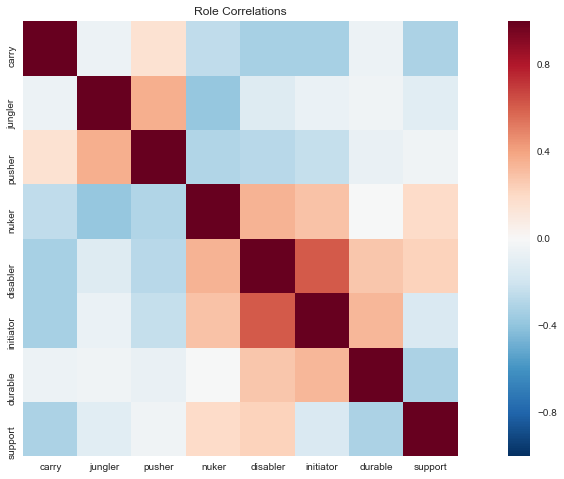

In [49]:
role_ix = data.columns[15:23]
role_corr = data[role_ix].corr()
plt.figure(figsize=(18,8))
sns.heatmap(role_corr, vmax=1, square=True)
plt.title('Role Correlations')

- There's a strong positive correlation between being an initiator and disabler. This makes total sense, since almost every hero that's considered an initiator does so through either an AOE (area of effect) or strong single-target disabling skill (if you know DotA, think Tidehunter's Ravage, Enigma's Blackhole, Batrider's Lasso, etc).


- Being a carry has a number of moderate negative correlations with other roles: nuker, disabler, initiator, and support. This makes sense since carry heroes are primarily focused on dealing as much right-click (regular attack) damage as possible.


- There's a moderate positive correlation with being a jungler and a pusher. Most heroes that can jungle in the early game can only do so because of support units they can summon (Nature's Prophet's treants, Lycan's wolves, Enigma's eidolons, etc). These summonable units are also great for pushing out creep waves later on in the game too.

Let's now take a look at the percentage of games I've played in each role across all games, and compare that with the distribution of each role in the total hero pool:

([<matplotlib.axis.YTick at 0x2a1c0542828>,
 <a list of 10 Text yticklabel objects>)

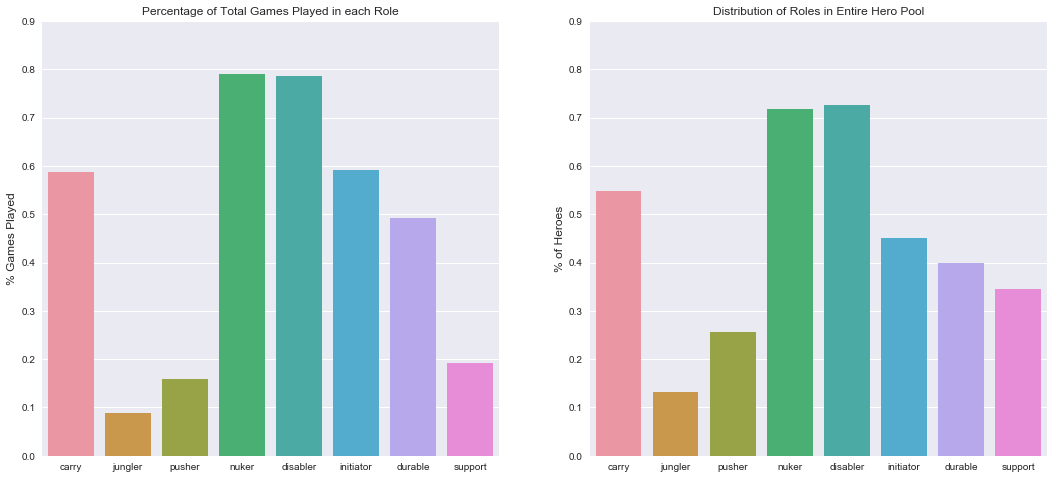

In [50]:
role_pct = []
for i in role_ix:
    role_pct.append((len(data[data[i] == 1]) / total_games))

plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
sns.barplot(role_ix, role_pct)
plt.title('Percentage of Total Games Played in each Role')
plt.ylabel('% Games Played', fontsize='large')
plt.yticks(np.arange(0.0, 1, 0.1))


role_dist_pct = hero_data[role_ix].sum() / total_hero_pool
plt.subplot(1,2,2)
sns.barplot(role_ix, role_dist_pct)
plt.title('Distribution of Roles in Entire Hero Pool')
plt.ylabel('% of Heroes', fontsize='large')
plt.yticks(np.arange(0.0, 1, 0.1))

In [51]:
role_differences = np.array(role_pct) - np.array(role_dist_pct)
print('Deltas between roles played and role distribution:')
list(zip(role_ix, (role_differences)))


Deltas between roles played and role distribution:


[('carry', 0.03893368534205599),
 ('jungler', -0.044725814161718572),
 ('pusher', -0.09732814702834916),
 ('nuker', 0.073698590913613082),
 ('disabler', 0.059365073972788895),
 ('initiator', 0.13929499576570387),
 ('durable', 0.093406873390906808),
 ('support', -0.15264576776645125)]

- The distribution of roles I played generally resembles the overall hero pool's distribution; this suggests that I often played heroes that fit within the most frequent roles (nuker, disabler, carry).


- However, you can see that I played less jungling, pushing, and support roles than the total distribution. The correlation between jungling and pushing is hinted at here, as not playing one comes with a good chance of not playing the other. Support, my least played role with a delta of -15% from the overall role distribution, clearly shows a preference towards not wanting to carry that burden.


- The highest positive difference between roles played and the roles distribution is with durable heroes (+9%), with slightly less than 50% of my total games played in this role. This coincides with durability being so closely tied to the strength-based heroes I played in 40% of all my games.


- I played carry heroes in almost 60% of all my games; although it doesn't have as high a delta as durable, nuker, or disabler, the combination of these roles most-played indicate a clear preference towards powerful teamfighting heroes.

Next, let's look at W/L, KDR, and KDA for each role:

In [52]:
role_wl = []
role_kdr = []
role_kda = []
for i in role_ix:
    role_group = data.groupby(i).mean()
    role_wl.append(role_group['result'][1])
    role_kdr.append(role_group['kdr'][1])
    role_kda.append(role_group['kda'][1])

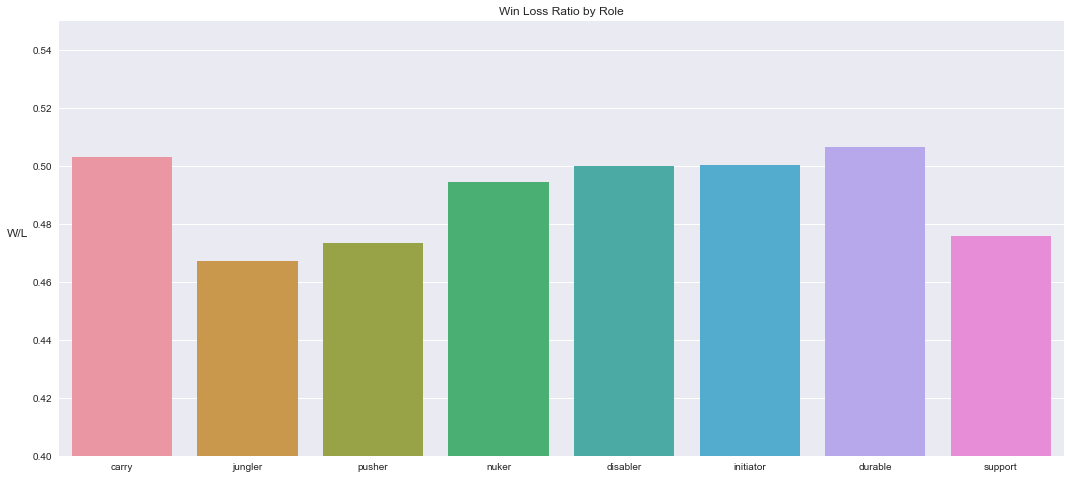

In [53]:
plt.figure(figsize=(18,8))
sns.barplot(role_ix, role_wl)
plt.ylim((0.4, 0.55))
plt.title('Win Loss Ratio by Role')
plt.ylabel('W/L', rotation='horizontal', horizontalalignment='right', fontsize='large')

In [54]:
list((zip(role_ix, role_wl)))

[('carry', 0.50303313112459169),
 ('jungler', 0.46728971962616822),
 ('pusher', 0.47332185886402756),
 ('nuker', 0.49427679500520294),
 ('disabler', 0.49982535801606709),
 ('initiator', 0.500464252553389),
 ('durable', 0.50641383156720576),
 ('support', 0.4757834757834758)]

- It seems that no one role in particular gives me an increased chance of winning, with carry, disabler, initiator, and durable all sitting at my average W/L ratio of 0.5.


- Jungler, pusher, and support all have about a -3% decrease from the average, suggesting that I'm slightly more likely to lose playing these roles. 

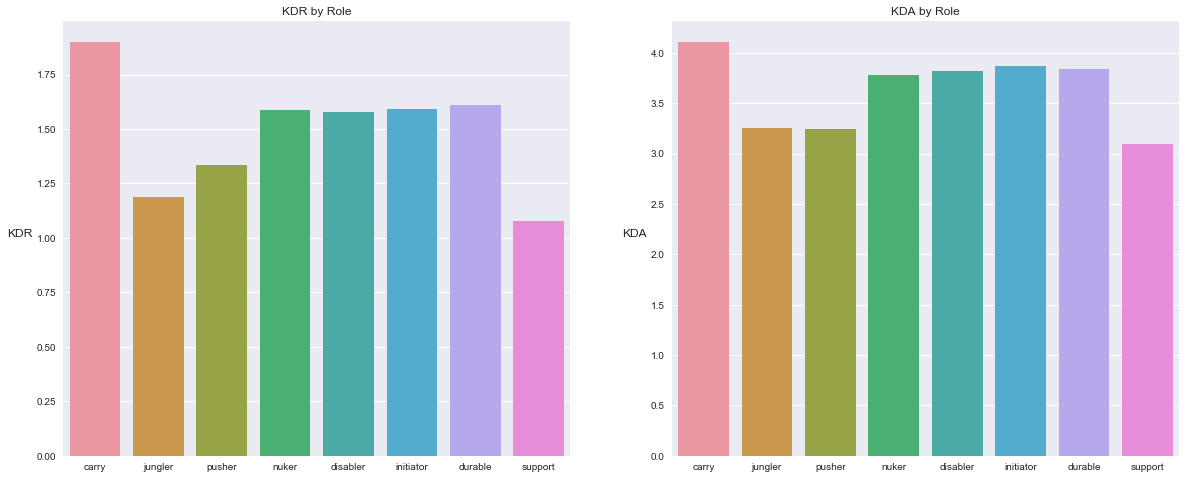

In [55]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.barplot(role_ix, role_kdr)
plt.ylabel('KDR', rotation='horizontal', horizontalalignment='right', fontsize='large')
plt.title('KDR by Role')

plt.subplot(1,2,2)
sns.barplot(role_ix, role_kda)
plt.ylabel('KDA', rotation='horizontal', horizontalalignment='right', fontsize='large')
plt.title('KDA by Role')

- Looking at KDR, carry has a substantial lead between itself and the other roles. Carries are relied on to do most of the killing late game, so the higher KDR makes sense.


- KDA closes the distance between carry and the other roles, as the inclusion of assists account for many of the key functions that teamfighting disablers, initiators, and supports play.


- Looking at the W/L, KDR, and KDA ratios together, it seems the best combination of roles to maximize my chances of winning is picking durable carry heroes with the ability to initiate fights. 

### Legs?!

Dota 2 tracks the number of legs each hero has solely for cosmetic purposes, i.e. selling pants and other accessoriess to put on your hero's character model in-game. Have more legs doesn't really give you in-game speed advantage; if anything, having no legs would probably be faster because that means you must be floating around or something. Still, it's a stat in the hero data and I'll be damned if I don't try to find meaning in it.

How many legs can the heroes in Dota 2 have?

In [56]:
num_legs = hero_data['legs'].unique()
num_legs

array([2, 4, 0, 6, 8], dtype=int64)

How many legs do they have combined? What's the average number of legs?

In [57]:
total_legs = hero_data['legs'].sum()
avg_legs = total_legs / total_hero_pool
print('Total Legs:', total_legs)
print('Average # of Legs:', avg_legs)

Total Legs: 236
Average # of Legs: 2.088495575221239


Most heroes in Dota 2 are bipedal, fascinating...

W/L?

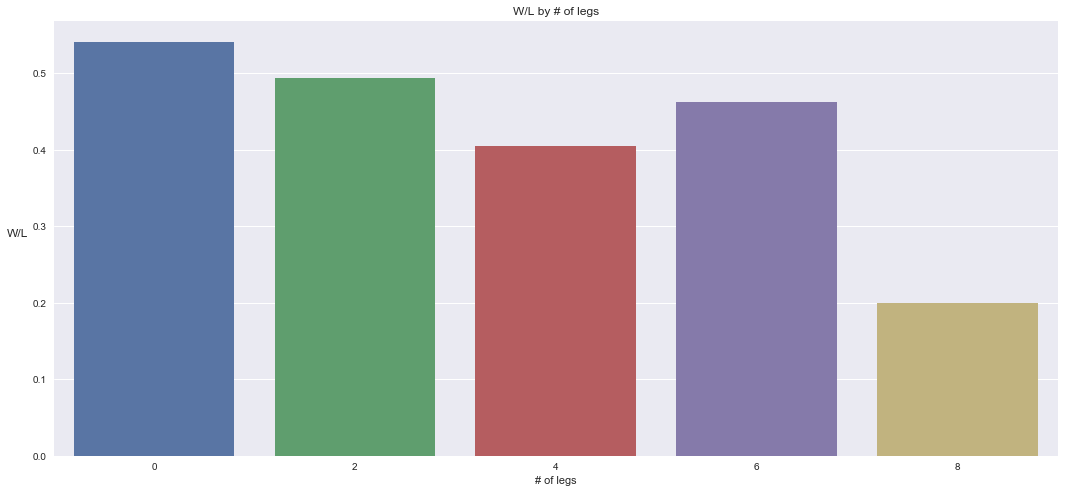

In [58]:
legs_wl = data.groupby('legs')['result'].mean()  
plt.figure(figsize=(18,8))
sns.barplot(legs_wl.index, legs_wl)
plt.title('W/L by # of legs')
plt.xlabel('# of legs')
plt.ylabel('W/L', rotation='horizontal', horizontalalignment='right', fontsize='large')

It seems the more legs you have, the less likely you are to win (with the exception of being a six-legged bug)! Heroes with no legs at all seem to have the clear advantage; no legs means less appendages to chop off, no leg cramps, no shoelaces to get tripped up on...

Lets take a look and see who's in this no-legged league of legends:

In [59]:
no_legs_club = data.groupby('legs')['hero'].unique()[0]
no_legs_club

array(['Razor', 'Shadow Fiend', 'Morphling', 'Spectre', 'Enigma',
       'Venomancer', 'Io', 'Naga Siren', 'Viper', 'Slardar', 'Medusa'], dtype=object)

### Time

DotA sucks away time like a black hole does to light - once you pass the event horizon, there is no escape from the void. The general relativity of each match causes time to slow to a crawl, especially when its a shitty one. Yet time on the outside flows naturally... Minutes turn into hours, hours turn into days, and next thing you know you've 3000 games deep and you carry with you the soul of a jaded old man.

All that being said, let's look at how my W/L ratio varies over particular lengths of time, starting with match duration:

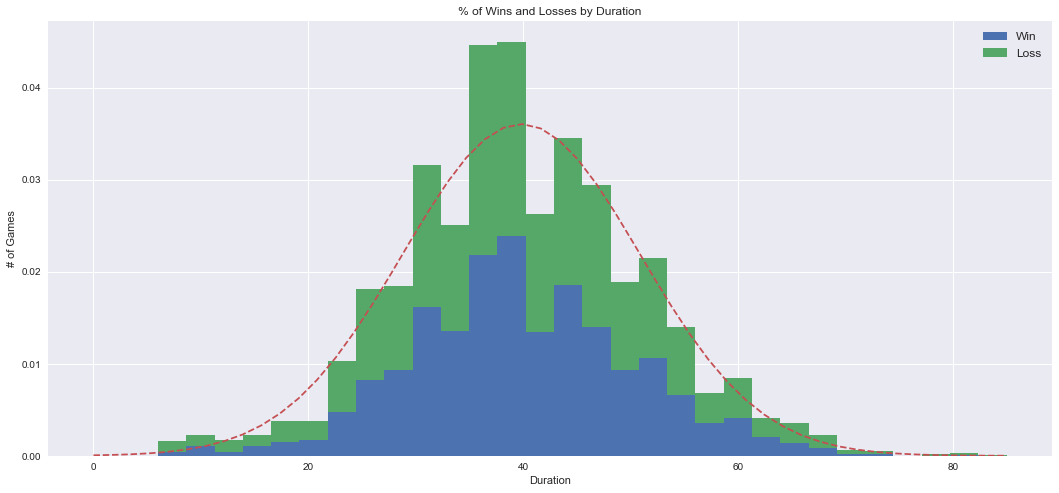

In [60]:
### Win Loss by Duration

# histogram
plt.figure(figsize=(18,8))
plt.hist([data['duration'].loc[data['result'] == 1],
        data['duration'].loc[data['result'] != 1]], stacked=True,
        bins=30, label=['Win', 'Loss'], normed=True)
# gauss. curve
duration_space = np.linspace(0, data['duration'].max())
plt.plot(duration_space, stats.norm.pdf(duration_space, data['duration'].mean(),
                                        data['duration'].std()), '--')
plt.title('% of Wins and Losses by Duration')
plt.xlabel('Duration')
plt.ylabel('# of Games')
plt.legend(fontsize='large')

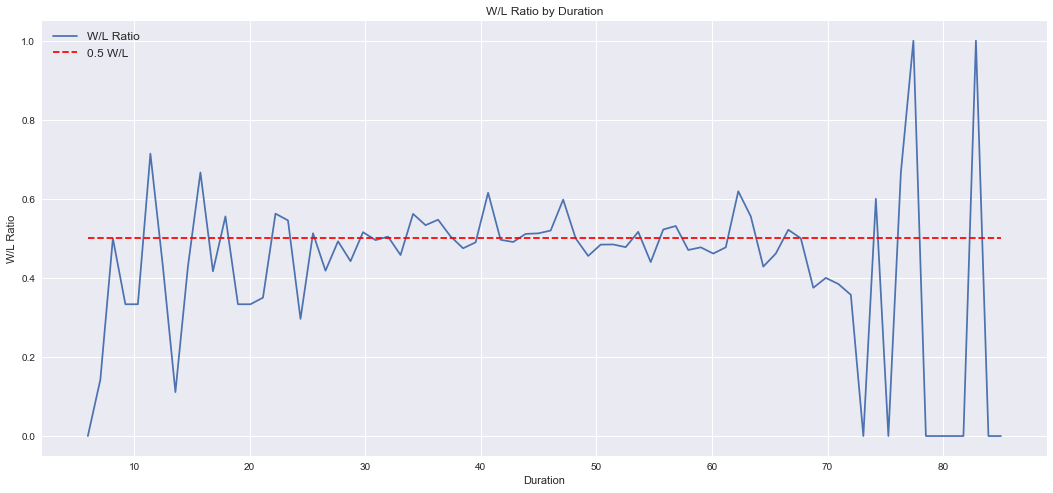

In [61]:
plt.figure(figsize=(18,8))
duration_wl = data.groupby('duration')['result'].mean()
duration_linspace = np.linspace(data['duration'].min(), data['duration'].max(), num=len(duration_wl))
plt.plot(duration_linspace, duration_wl, label='W/L Ratio')
plt.plot(duration_linspace, [0.5 for i in duration_linspace], 'r--', label='0.5 W/L')

plt.title('W/L Ratio by Duration')
plt.xlabel('Duration')
plt.ylabel('W/L Ratio')
plt.legend(fontsize='large')

- Game duration fits a beautiful normal distribution around the average length of 39 minutes. 


- Looking at W/L ratio, you can see that it really fluctuates around the extremeties of duration (less than 20 mins and more than 70) because only a small number of games are ever that short or long. It seems that I'm more likely to lose shorter games between 20 and 30 minutes long, whereas my best window for success seems to between 40 to 50 minutes. Intuitively this makes total sense to me; in most games where I played as a carry, it took about 30 minutes to "come online", i.e. get powerful enough to start taking over the game. If the other team was able to push fast enough and force a win before or just at that point in time, the carry often wasn't powerful enough to really help the team stop their advance. But between 40 minutes to an hour, the carry has enough items and momentum to take over the game and go for the win.


- Games over an hour long can be tricky, because past that point in time the outcome entirely comes down to team coordination and winning pivotal fights. By this late in the game most carries are max level and have their entire item builds, meaning how the team plays around them is essential to win.

I like the W/L ratio plot, because it really reflects how priorities and strategy change in DotA during different phases of the game. Now, let's take a look at my favourite (and most damning) visualization in this whole analysis: games played and W/L ratio distributed over 24 hours.

In [62]:
hourly_wl = data.groupby('hour')['result'].mean()/10 # divided by 10 so its scales visually with my histogram

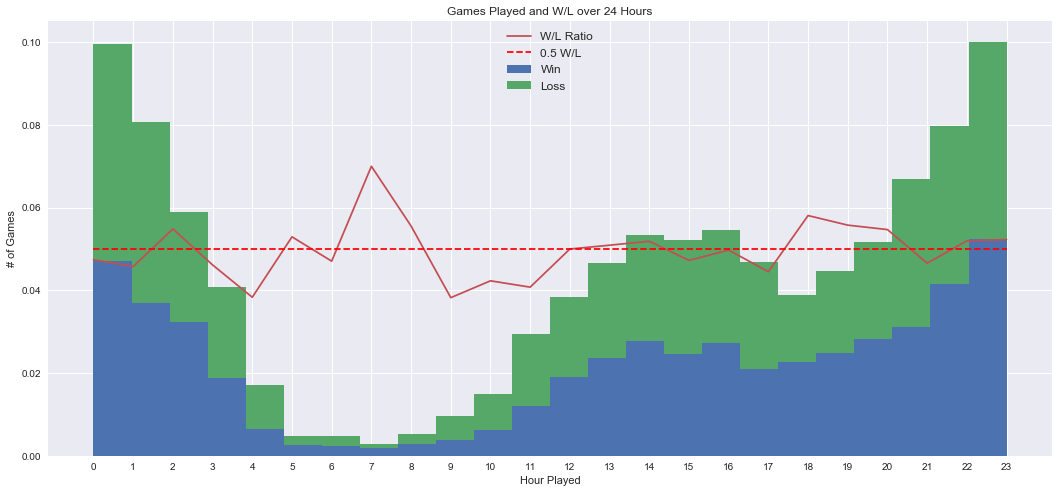

In [63]:
### Hourly games and W/L

plt.figure(figsize=(18,8))
plt.hist([data['hour'].loc[data['result'] == 1],
        data['hour'].loc[data['result'] != 1]], stacked=True,
        bins=24, label=['Win', 'Loss'], normed=True)
plt.plot(range(24), hourly_wl, label='W/L Ratio')
plt.plot(range(24), [0.05 for i in range(24)], 'r--', label='0.5 W/L')
plt.xlabel('Hour Played')
plt.xticks(range(24))
plt.ylabel('# of Games')
plt.legend(fontsize='large')
plt.title('Games Played and W/L over 24 Hours')

First of all, you can see two definite peaks around 0 and 23 hours. The large majority of my Dota games started at the crack of midnight, when I should have been sleeping like a normal person. I remember these times fondly; my parents would be asleep so I would raid the fridge for cookies and chocolate milk, then proceed to let sugar fuel me as I charged into online battle. My W/L ratio would hit its stride around 2am, and then steadily decline as I began to succumb to eye strain and a lack of sleep. My best (and most infrequent) games occurred in the early morning, around 7 to 8am when my mind was relatively fresh and I was presumably playing against people who didn't know when to call it quits themselves. 6 to 8pm was also a good time to play too, as at that point I was usually done eating dinner.

Looking at this plot is equal parts nostalgic and depressing, which really sums up the whole tone of this analysis for me. Let's see how much more depressing things can get as we zoom out and examine things through the lenses of months and years...

In [64]:
months_years = data.groupby(['year', 'month'])
months_wl = months_years['result'].mean()

In [65]:
timeline_wl = []

for year in range(2012, 2018):
    for month in range(1, 13):
        timeline_wl.append(months_wl.unstack()[month][year])
        
timeline_linspace = range(len(timeline_wl))

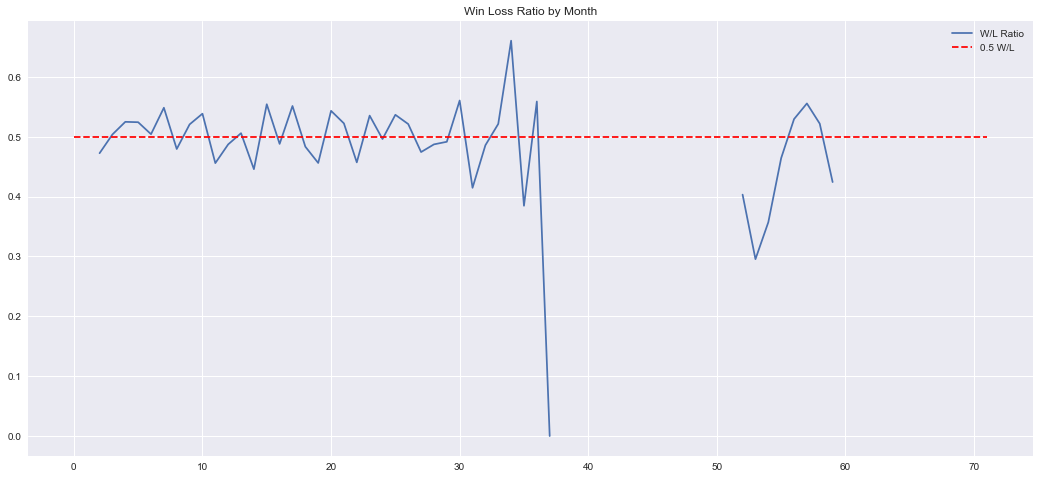

In [66]:
### Monthly W/L

plt.figure(figsize=(18,8))
plt.plot(timeline_linspace, timeline_wl, label='W/L Ratio')
plt.plot(timeline_linspace, [0.5 for i in timeline_linspace], 'r--', label="0.5 W/L")
plt.title('Win Loss Ratio by Month')
plt.legend()

The above plot charts my W/L ratio from the first month I played Dota 2, March 2012, to my last recorded game in June 2017. I played Dota 2 **every month** from March 2012 all the way to February 2015, after which I took a year long hiatus. During that incrediblely long streak of playing, my W/L seemed to bounce between 0.55 and 0.45, showing no real month-to-month improvement (sigh). Somewhere around my 35th month of playing my W/L spiked to 0.65; let's look at the data directly to figure out why:

In [67]:
months_wl.unstack()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2012,NaN,NaN,0.472441,0.503759,0.524823,0.524194,0.504202,0.548387,0.479452,0.520548,0.538462,0.455882
2013,0.487179,0.505882,0.445783,0.554217,0.488000,0.551282,0.483333,0.456140,0.543210,0.522222,0.457143,0.535211
2014,0.496124,0.536585,0.521127,0.474359,0.487179,0.491525,0.560440,0.414634,0.485714,0.521368,0.660377,0.384615
2015,0.558824,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,0.403226,0.295455,0.357143,0.464286,0.529412,0.555556,0.521739,0.424242
2017,NaN,0.250000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


November 2014 seemed to be a hot month for me, with my W/L topping out at 0.66. Let's see which heroes I played that month:

In [68]:
hot_month = data[data.year == 2014][data.month == 11]
hot_month['hero'].value_counts()

C:\Users\Will\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


Earth Spirit         22
Legion Commander      6
Ember Spirit          4
Spectre               3
Brewmaster            2
Pudge                 2
Templar Assassin      2
Necrophos             2
Medusa                2
Windranger            1
Clockwerk             1
Lone Druid            1
Gyrocopter            1
Bounty Hunter         1
Weaver                1
Outworld Devourer     1
Bane                  1
Name: hero, dtype: int64

22 games with Earth Spirit! This was a point in time where frankly he was broken as hell to play. With his incredible combination of nuking and disabling abilities, Earth Spirit clearly needed a lot of reworking before he could even remotely be considered a fair hero. This much-needed balancing didn't come until a few months later, but that didn't stop me from abusing him to my advantage in the meantime.

I got so good with Earth Spirit that I even felt compelled to make a montage displaying my **elite** skills; [check it out, in all its poorly-edited glory!](https://www.youtube.com/watch?v=dwRKkuPZch0)

Pretty badass, no? No? Alright, moving on... Let's see how many games I played each year:

In [94]:
## First, a nifty function to annotate barplots
def annotate(horizontal=False):
    ax = plt.gca()    
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height() + 5, '%d' % int(p.get_height()), 
            fontsize=12, ha='center', va='bottom')

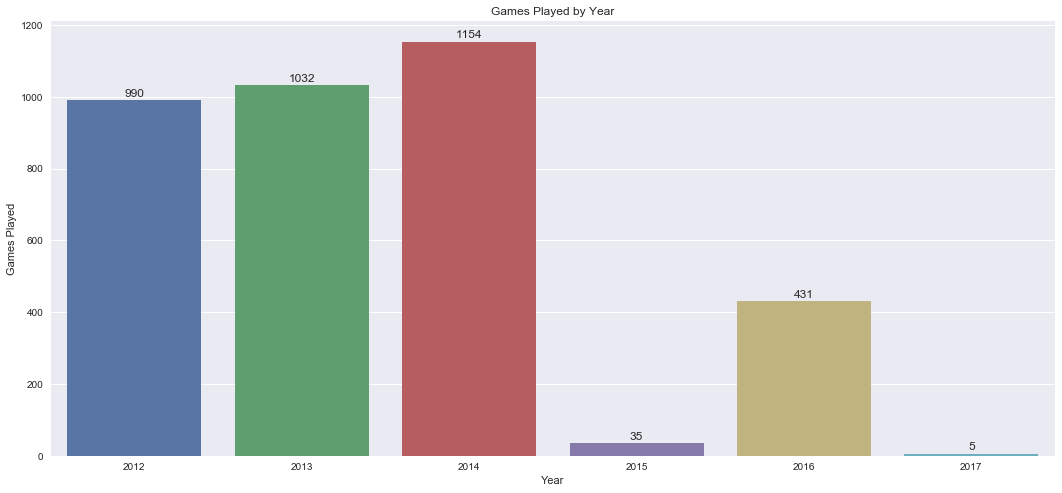

In [95]:
### Games played over the years

games_over_the_years = data['year'].value_counts()
plt.figure(figsize=(18,8))
sns.barplot(games_over_the_years.index, games_over_the_years)
plt.title('Games Played by Year')
plt.ylabel('Games Played')
plt.xlabel('Year')
annotate()

Here we can see that I increasingly became more addicted to Dota 2 since its launch in 2012 all the way up to 2015. Looking back at that time in my life, 2012 was the year when I graduated high school and 2013 was my start in university; during this tough time of transition, I clearly needed a pillar to support myself emotionally... I came to my senses in 2015, and despite a mild ressurgence the following year, I had mostly kicked Dota 2 for good.

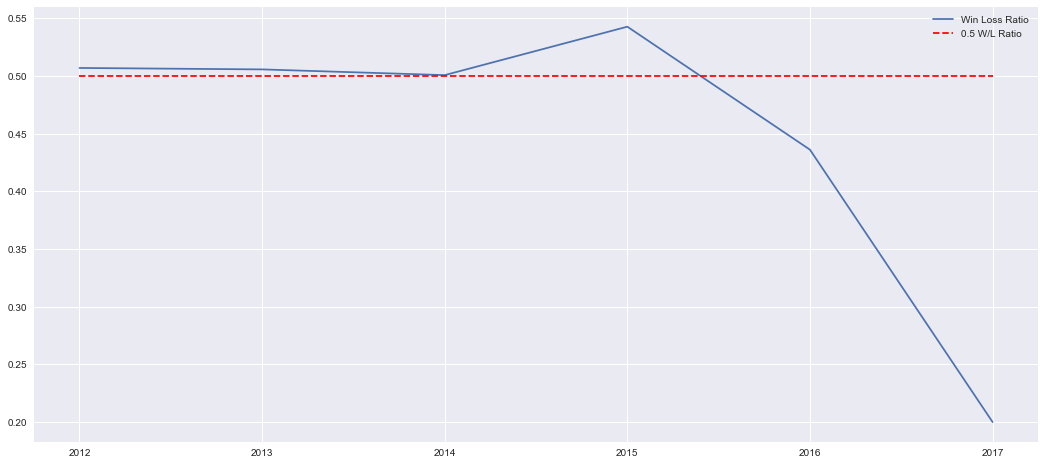

In [70]:
years = data.groupby('year')
years_wl = years['result'].mean()

plt.figure(figsize=(18,8))
plt.plot(years_wl.index, years_wl, label='Win Loss Ratio')
plt.plot(years_wl.index, [0.5 for i in years_wl.index], 'r--', label='0.5 W/L Ratio')
plt.legend()

This plot of my year-over-year W/L is slightly deceiving - the substantial increase in 2015 is simply a result of playing less games; winning the majority of the 35 games I played that entire year isn't a great indicator of my overall skill. Points of significance here are the duration between 2012 and 2014 where my W/L slowly declined to the 0.5 average, and also 2016 where I simply just sucked a little bit more overall.

Finally, let's take a look at the 10 most-played heroes of each year:

In [71]:
### most played hero each year

def mostPlayedByYear(year, count=10):
    hero_names = []
    games_played = []
    win_loss = []
    
    for name in years['hero'].value_counts()[year][:count].index:
        hero_names.append(name)
    for n_games in years['hero'].value_counts()[year][:count]:
        games_played.append(n_games)
    for hero in hero_names:
        win_loss.append(round(data['result'][data['hero'] == hero][data['year'] == year].mean(), 2))
        
    print('\t\t---', year,'---')
    title = 'Hero\t\tGames Played\tWin Loss Ratio'
    print(title)
    print('-'*len(title) + 13*'-')
    try:
        for i in range(count):
            if len(hero_names[i]) < 9:
                hero_names[i] = hero_names[i] + '   '
            if len(str(games_played[i])) < 2:
                games_played[i] = str(games_played[i]) + ' '
            if len(hero_names[i]) > 14:
                print(hero_names[i],'   ',games_played[i],'\t    ', win_loss[i])
            else:    
                print(hero_names[i],'\t    ',games_played[i],'\t    ', win_loss[i])
    except IndexError:
        pass
    
    # a lot of effort and tweaking to get fancy looking tables!

In [72]:
mostPlayedByYear(2012)

		--- 2012 ---
Hero		Games Played	Win Loss Ratio
----------------------------------------------
Shadow Demon 	     65 	     0.31
Pudge    	     61 	     0.59
Rubick    	     54 	     0.7
Morphling 	     50 	     0.52
Lone Druid 	     46 	     0.46
Clockwerk 	     45 	     0.64
Storm Spirit 	     40 	     0.55
Beastmaster 	     32 	     0.53
Enigma    	     30 	     0.7
Brewmaster 	     28 	     0.43


My first year of Dota 2 starts off with a bang; my most played hero, Shadow Demon, has a whopping W/L ratio of 0.34. This was a support hero that I really liked playing, but could never really get wins with because he relied too much on the rest of the team to carry him. My highest W/L ratio of 0.7 was with both Rubick and Enigma, two other support heroes who were able to control enemy heroes and earn more assists in teamfights. I also played Pudge surprisingly well during this time too.

In [73]:
mostPlayedByYear(2013)

		--- 2013 ---
Hero		Games Played	Win Loss Ratio
----------------------------------------------
Rubick    	     92 	     0.51
Pudge    	     60 	     0.47
Puck    	     50 	     0.56
Clockwerk 	     48 	     0.5
Earth Spirit 	     45 	     0.56
Brewmaster 	     38 	     0.5
Ember Spirit 	     35 	     0.57
Shadow Demon 	     35 	     0.37
Alchemist 	     34 	     0.47
Medusa    	     30 	     0.53


2013 saw the addition of both Earth and Ember Spirit, two heroes that would eventually become my top most played. Right out of the gate I was able to get above average W/L ratios with them, cementing their popularity in the years to come. Despite being my most played hero of the year, Rubick's W/L ratio plummeted down to 0.51. Pudge's W/L fell to below average this year, signalling that perhaps it was time to try something new.

In [74]:
mostPlayedByYear(2014)

		--- 2014 ---
Hero		Games Played	Win Loss Ratio
----------------------------------------------
Ember Spirit 	     192 	     0.61
Earth Spirit 	     185 	     0.52
Pudge    	     93 	     0.45
Templar Assassin     69 	     0.55
Brewmaster 	     60 	     0.58
Shadow Fiend 	     55 	     0.56
Clockwerk 	     31 	     0.58
Anti-Mage 	     22 	     0.41
Pugna    	     22 	     0.5
Morphling 	     20 	     0.45


In 2014 I played the most Dota in my entire life, seeing pretty strong results with many of my most played heroes. This was the first year that (apart from a brief obsession with playing Pugna) I moved away from supporting in any capacity and focused on high-impact carry and teamfighting heroes. I was incredibly successful with Ember Spirit, earning a 0.61 W/L ratio over 192 games. I also had above averages with Templar Assassin, Shadow Fiend, Clockwerk, and most notably, Brewmaster. It was a good year of Dota.

In [75]:
mostPlayedByYear(2015)

		--- 2015 ---
Hero		Games Played	Win Loss Ratio
----------------------------------------------
Kunkka    	     11 	     0.45
Earth Spirit 	     6  	     0.5
Abaddon    	     3  	     1.0
Queen of Pain 	     2  	     1.0
Undying    	     2  	     0.5
Anti-Mage 	     1  	     0.0
Death Prophet 	     1  	     0.0
Dragon Knight 	     1  	     0.0
Ember Spirit 	     1  	     0.0
Enigma    	     1  	     0.0


I definitely burnt myself out after 2014, because I barely played any Dota 2 in 2015. The only worthwhile comment to make here is that I began experimenting with Kunkka closer to the end of the year.

In [76]:
mostPlayedByYear(2016)

		--- 2016 ---
Hero		Games Played	Win Loss Ratio
----------------------------------------------
Kunkka    	     107 	     0.47
Brewmaster 	     33 	     0.67
Troll Warlord 	     28 	     0.36
Tiny    	     27 	     0.26
Ember Spirit 	     26 	     0.23
Legion Commander     20 	     0.4
Sniper    	     17 	     0.35
Clockwerk 	     15 	     0.53
Earth Spirit 	     15 	     0.53
Shadow Fiend 	     11 	     0.55


This experiment with Kunkka continued strong into 2016, with him being my most played hero by a very wide margin. Kunkka is really fun to play, but unfortunately he's not the kind of carry that can consistently carry games on his own merit.

I can tell that I was getting bored with Dota 2 in 2016, because I put a lot of effort into playing new heroes. These experiments with heroes like Troll Warlord, Tiny, Legion Commander and Sniper were met with little success. Tiny's disgustingly low W/L ratio of 0.26 is only surpassed in shame by Ember Spirit's 0.23; what was once my strongest bread-and-butter hero of 2014 became a husk of his former self, in large part due to balance patches that took away a lot of his ability to carry as hard as he did before.

The only success story of 2016 was Brewmaster, who I was able to score an extremely high 0.67 W/L ratio with over 33 games. Considering how he started off with a W/L of 0.43 in 2012 that consistently grew over time, I'm proud of how I improved with him over the years.

In [77]:
mostPlayedByYear(2017)

		--- 2017 ---
Hero		Games Played	Win Loss Ratio
----------------------------------------------
Kunkka    	     1  	     1.0
Nyx Assassin 	     1  	     0.0
Storm Spirit 	     1  	     0.0
Sven    	     1  	     0.0
Troll Warlord 	     1  	     0.0


2017 was a complete wash. I remember each game I played this year, and all of them were in internet cafes (I had to delete Dota of my computer as a preventative measure). I somehow managed to win one as Kunkka while I was in vacation in Hong Kong; besides that, the other four games were either half-assed or excuses to kill time before leaving to do something better with my life.

One last interesting visualization is how my W/L ratio with my top 10 most played heroes changed over time. For years where I didn't play any of these heroes, I've propogated the previous year's W/L forward to make things easier to visualize. I've also excluded 2017 for the sake of clarity:

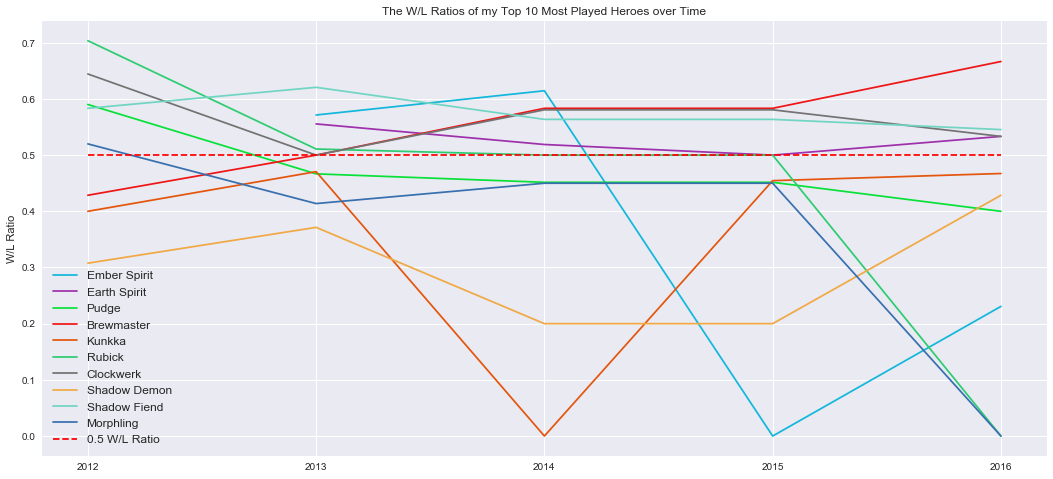

In [78]:
### top 10 hero W/L ratios over time

years_2012_to_2016 = [2012, 2013, 2014, 2015, 2016]
colour_palette = ["#13b7db", "#9e31ab", "#09e139", "#ee1616", "#e4560d",
                 "#2ecc71", "#737373", "#f0a944", "#71d5c3", "#3870af"] # hex colours found online

hero_wl_yearly = data.groupby(['hero', 'year'])['result'].mean()
plt.figure(figsize=(18,8))
for colour_ix, hero in enumerate(hero_mostplayed30.index[:10]):
    label = "{}".format(hero)
    hero_wl = hero_wl_yearly[hero][years_2012_to_2016]
    hero_wl.fillna(method='ffill', inplace=True)
    plt.plot(years_2012_to_2016, hero_wl, label=label, color=colour_palette[colour_ix])

plt.plot(years_2012_to_2016, [0.5 for year in years_2012_to_2016], 'r--', label='0.5 W/L Ratio')
plt.xticks(years_2012_to_2016)
plt.legend(fontsize='large')
plt.ylabel('W/L Ratio')
plt.title('The W/L Ratios of my Top 10 Most Played Heroes over Time')

While it's a bit hard discern who is who with the colours, this visualization provides a decent look at how my success with these heroes changed over time. The biggest success story is with Brewmaster, whose W/L ratio steadily rose over the four years to be the top contender of 2016. Ember Spirit and Rubick are the biggest tragedies here for me, with their ratios both taking steep dives in 2015 and 2016 respectively. Heroes like Kunkka and Shadow Demon, although fluctuating over the four years, also dissapointingly never managed to even make it to an average 0.5 performance.

### Total Time in Game

Before I finish this analysis, there is one more depressing statistic I must come to bear. Just how much of my life - the only shot at conscious experience as I know it - did I spend honing untransferrable skills and arguing with other keyboard warriors in Dota 2? Let's break down the numbers:

In [79]:
total_minutes = data['duration'].sum()
total_minutes

145248.0

145,248 minutes doesn't sound that bad in my head, to be honest. It's kind of like trying to imagine a billion of something; my brain can't really fathom how big that number really is in minutes.

In [80]:
total_hours = total_minutes / 60
total_hours

2420.8

2420 hours beings to put things into perspective... That's like watching the extended edition of *Return of the King* 605 times!

In [81]:
total_days = total_hours / 24
total_days

100.86666666666667

Just over 100 days of my life... 

In [82]:
total_months = total_days / (365 / 12)
total_months

3.316164383561644

Three months... An entire summer of frolicking around in nature and getting into mischevious hijinks...

In [83]:
total_years = total_months / 12
total_years

0.2763470319634703

Almost one third of an entire trip around the sun...

In [84]:
total_life_playing_dota2 = total_years / 22
total_life_not_playing_dota2 = 1 - total_life_playing_dota2
total_life_playing_dota2

0.012561228725612288

And in the grand scheme of things, that's 1% of my entire life to date that I've spent playing Dota 2! 1% overall doesn't sound too bad I suppose... I know how much statisticians and analysts love pie charts, so let's see what that looks like in one of those:

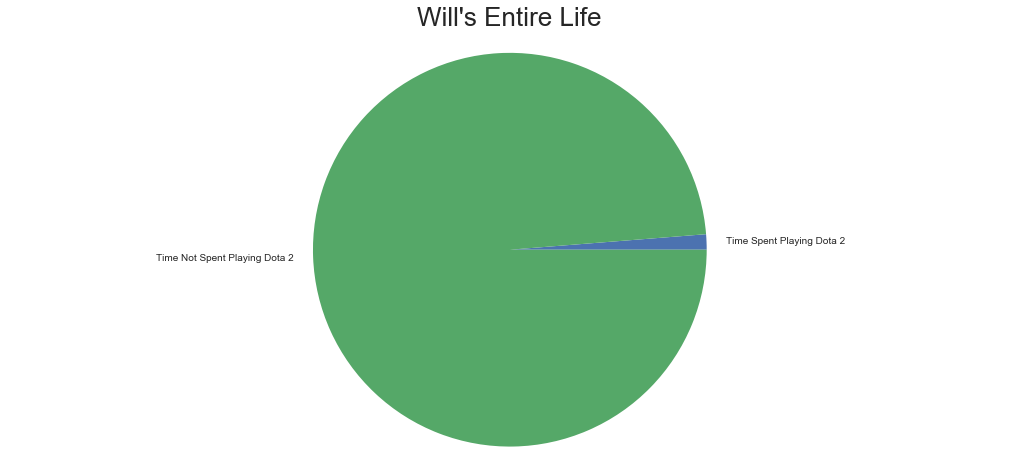

In [85]:
plt.figure(figsize=(18,8))
plt.pie([total_life_playing_dota2, total_life_not_playing_dota2],
        labels=['Time Spent Playing Dota 2', 'Time Not Spent Playing Dota 2'])
plt.axis('equal')
plt.title("Will's Entire Life", fontsize=26)

And if we're really trying to be fair here, I guess I shouldn't really include the time I spent sleeping in this statistic. For the sake of pushing this tired conclusion to its limits, let's see how much of my entire waking life I've spent playing Dota 2:

0.02


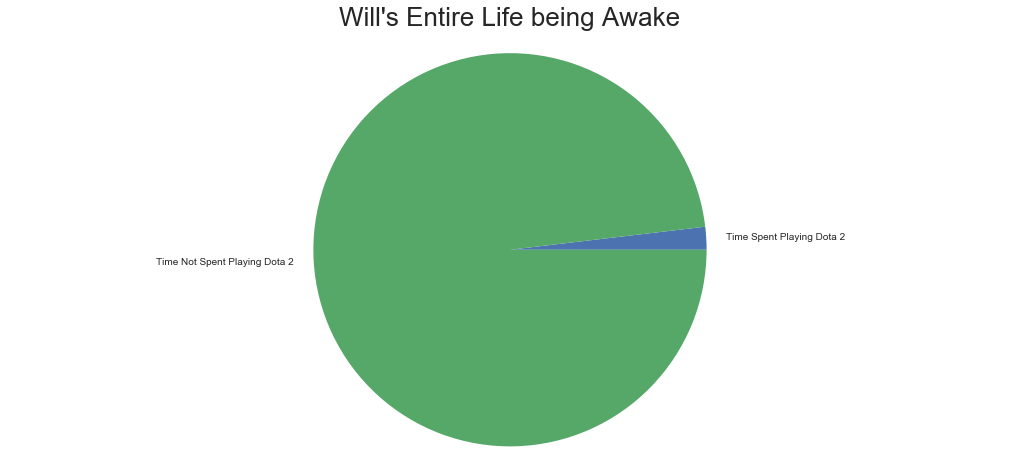

In [86]:
entire_waking_life = 22 * (2/3) # People typically spend a third of their life asleep (~8 hours sleeping).
                                # But did I really sleep that much with DotA in my life?
total_waking_life_playing_dota2 = total_years / entire_waking_life
print(round(total_waking_life_playing_dota2, 2))
total_waking_life_not_playing_dota2 = 1 - total_life_playing_dota2
total_waking_life_playing_dota2

plt.figure(figsize=(18,8))
plt.pie([total_waking_life_playing_dota2, total_waking_life_not_playing_dota2],
        labels=['Time Spent Playing Dota 2', 'Time Not Spent Playing Dota 2'])
plt.axis('equal')
plt.title("Will's Entire Life being Awake", fontsize=26)

2% of my entire waking life! And I can't forget to add onto that the few weeks I've spent making this analysis! If you've made it this far, thanks for sticking it out to the very end! As much as I joke about Dota 2 sucking a good deal of my time, energy, and faith in humanity away, it truly was an excellent (and free!) game that gave me lots of happy memories and enjoyment. And with that being said, I plan on never relapsing and playing it again!

### <center> Thanks for reading!